<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1851-1900.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1222]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1223]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

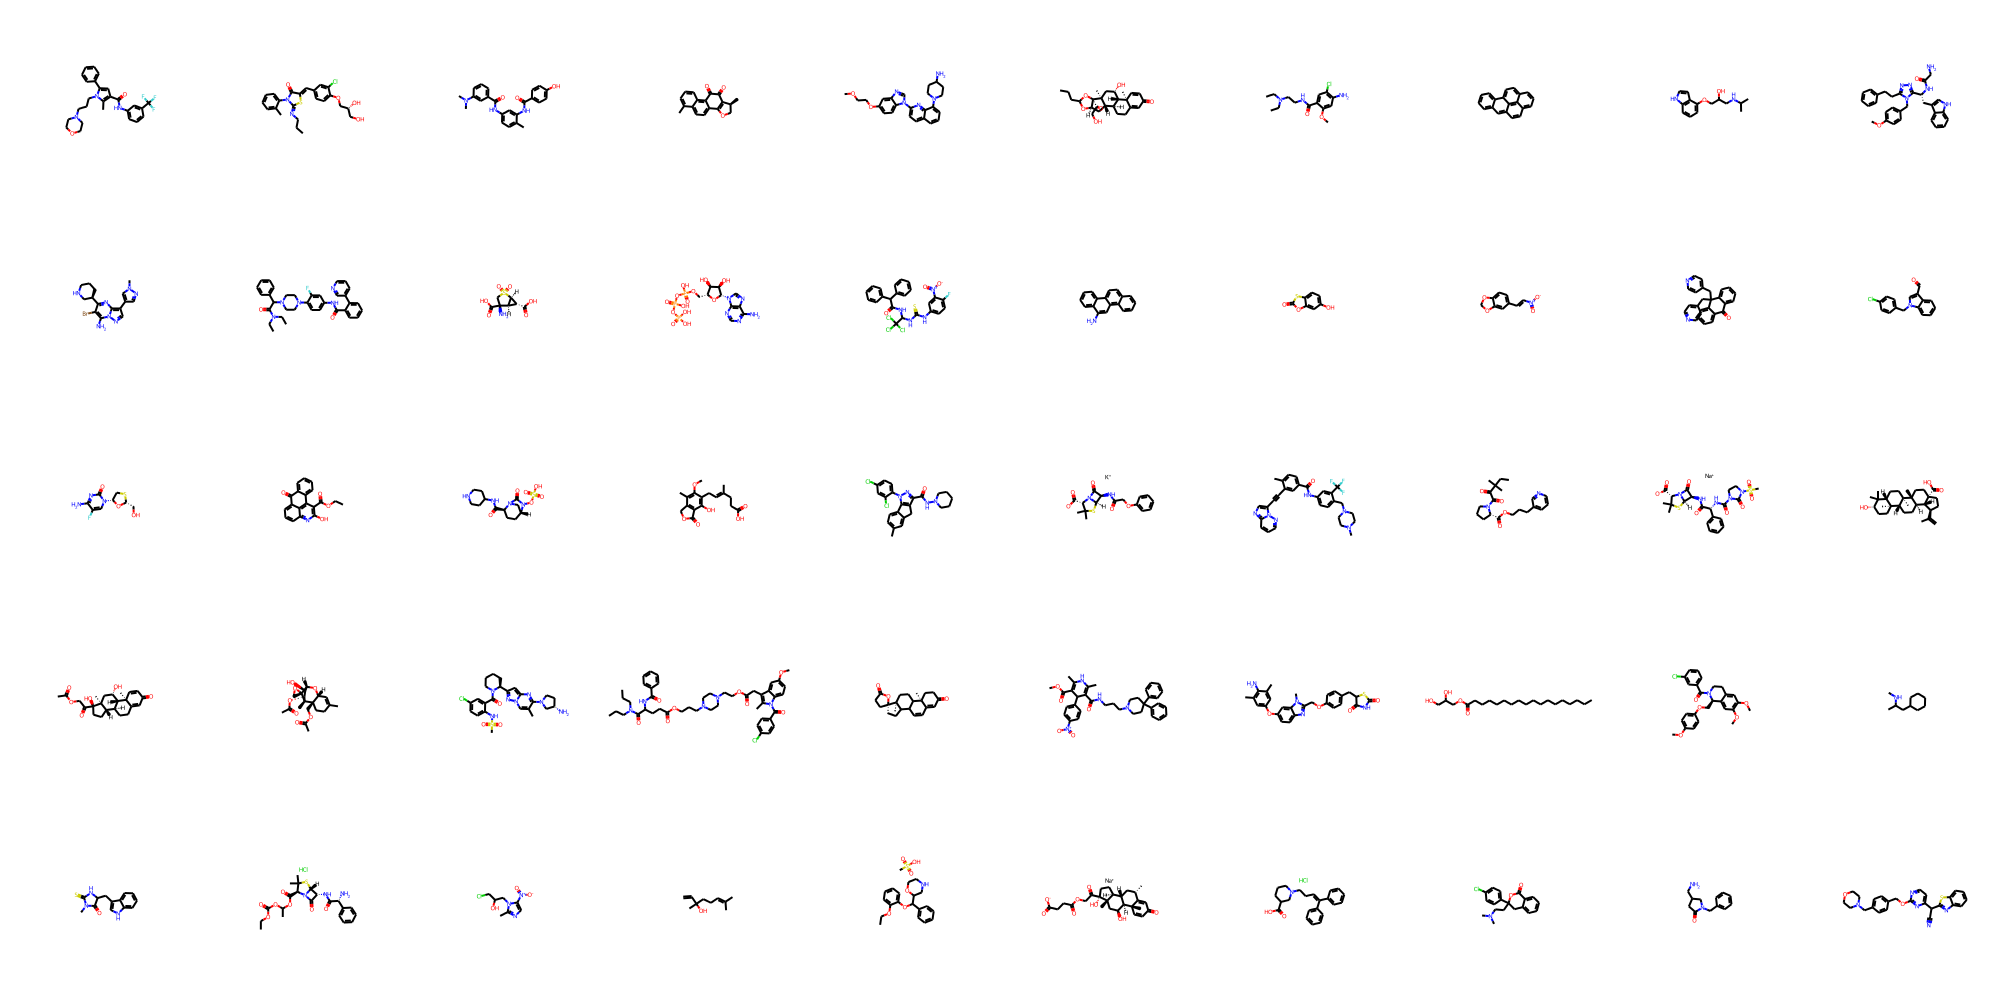

In [1224]:
smiles_list = [

'Cc1c(C(=O)Nc2cccc(C(F)(F)F)c2)cc(-c2ccccc2)n1CCCN1CCOCC1',
'CCC/N=C1\S/C(=C\c2ccc(OC[C@H](O)CO)c(Cl)c2)C(=O)N1c1ccccc1C',
'Cc1ccc(NC(=O)c2cccc(N(C)C)c2)cc1NC(=O)c1ccc(O)cc1',
'Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1',
'COCCOc1ccc2c(c1)ncn2-c1ccc2cccc(N3CCC(N)CC3)c2n1',
'CCCC1O[C@@H]2C[C@H]3[C@@H]4CCC5=CC(=O)C=C[C@]5(C)[C@H]4[C@@H](O)C[C@]3(C)[C@]2(C(=O)CO)O1',
'CCN(CC)CCNC(=O)c1cc(Cl)c(N)cc1OC',
'c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34',
'CC(C)NCC(O)COc1cccc2[nH]ccc12',
'COc1ccc(Cn2c(CCc3ccccc3)nnc2[C@@H](Cc2c[nH]c3ccccc23)NC(=O)CN)cc1',
'Cn1cc(-c2cnn3c(N)c(Br)c([C@@H]4CCCNC4)nc23)cn1',
'CCN(CC)C(=O)C(c1ccccc1)N1CCN(c2ccc(NC(=O)c3ccccc3-c3cccnc3)cc2F)CC1',
'N[C@@]1(C(=O)O)CS(=O)(=O)[C@H]2[C@H](C(=O)O)[C@H]21',
'Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O)OP(=O)(O)O)[C@@H](O)[C@H]1O',
'O=C(NC(NC(=S)Nc1ccc(F)c([N+](=O)[O-])c1)C(Cl)(Cl)Cl)C(c1ccccc1)c1ccccc1',
'Nc1cc2c3ccccc3ccc2c2ccccc12',
'O=c1oc2cc(O)ccc2s1',
'O=[N+]([O-])/C=C/c1ccc2c(c1)OCO2',
'O=C1c2ccccc2C(Cc2ccncc2)(Cc2ccncc2)c2ccccc21',
'O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12',
'Nc1nc(=O)n([C@@H]2CS[C@H](CO)O2)cc1F',
'CCOC(=O)c1c(O)nc2cccc3c2c1-c1ccccc1C3=O',
'O=C(NC1CCNCC1)[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)O',
'COc1c(C)c2c(c(O)c1C/C=C(\C)CCC(=O)O)C(=O)OC2',
'Cc1ccc2c(c1)Cc1c(C(=O)NN3CCCCC3)nn(-c3ccc(Cl)cc3Cl)c1-2',
'CC1(C)S[C@@H]2[C@H](NC(=O)COc3ccccc3)C(=O)N2[C@H]1C(=O)[O-].[K+]',
'Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)cc1C#Cc1cnc2cccnn12',
'CCC(C)(C)C(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1',
'CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](NC(=O)N3CCN(S(C)(=O)=O)C3=O)c3ccccc3)C(=O)N2[C@H]1C(=O)[O-].[Na+]',
'C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC[C@@H]4[C@@]5(C)CC[C@H](O)C(C)(C)[C@@H]5CC[C@]43C)[C@@H]12',
'CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@H]3[C@@H](O)C[C@@]21C',
'CC(=O)OC[C@]12CCC(C)=C[C@H]1O[C@@H]1[C@H](O)[C@@H](OC(C)=O)[C@@]2(C)[C@@]12CO2',
'Cc1cn2nc([C@@H]3CCCCN3C(=O)c3cc(Cl)ccc3NS(C)(=O)=O)cc2nc1N1CC[C@H](N)C1',
'CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)Cc2c(C)n(C(=O)c3ccc(Cl)cc3)c3ccc(OC)cc23)CC1)NC(=O)c1ccccc1',
'C[C@]12CCC3C(C=CC4=CC(=O)CC[C@@]43C)C1CC[C@@]21CCC(=O)O1',
'COC(=O)C1=C(C)NC(C)=C(C(=O)NCCCN2CCC(c3ccccc3)(c3ccccc3)CC2)C1c1ccc([N+](=O)[O-])cc1',
'Cc1cc(Oc2ccc3nc(COc4ccc(CC5SC(=O)NC5=O)cc4)n(C)c3c2)cc(C)c1N',
'CCCCCCCCCCCCCCCCCC(=O)OCC(O)CO',
'COc1ccc(OC[C@@H]2c3cc(OC)c(OC)cc3CCN2C(=O)c2cccc(Cl)c2)cc1',
'CNC(C)CC1CCCCC1',
'CN1C(=O)C(Cc2c[nH]c3ccccc23)NC1=S',
'CCOC(=O)OC(C)OC(=O)[C@@H]1N2C(=O)[C@@H](NC(=O)[C@H](N)c3ccccc3)[C@H]2SC1(C)C.Cl',
'Cc1ncc([N+](=O)[O-])n1CC(O)CCl',
'C=CC(C)(O)CCC=C(C)C',
'CCOc1ccccc1OC(c1ccccc1)C1CNCCO1.CS(=O)(=O)O',
'C[C@H]1C[C@H]2[C@@H]3CC[C@](O)(C(=O)COC(=O)CCC(=O)[O-])[C@@]3(C)C[C@H](O)[C@@H]2[C@@]2(C)C=CC(=O)C=C12.[Na+]',
'Cl.O=C(O)C1CCCN(CCC=C(c2ccccc2)c2ccccc2)C1',
'CN(C)CCC1(c2ccc(Cl)cc2)Cc2ccccc2C(=O)O1',
'NCC1CC(=O)N(Cc2ccccc2)C1',
'N#CC(c1ccnc(OCc2ccc(CN3CCOCC3)cc2)n1)c1nc2ccccc2s1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



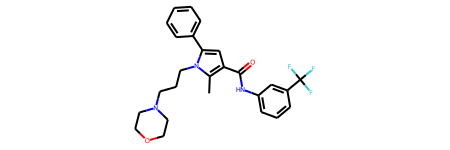

In [1225]:
M1 = mol_list [0]
M1

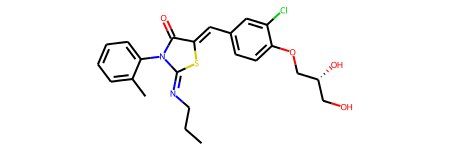

In [1226]:
M2 = mol_list [1]
M2

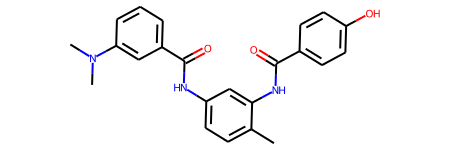

In [1227]:
M3 = mol_list [2]
M3

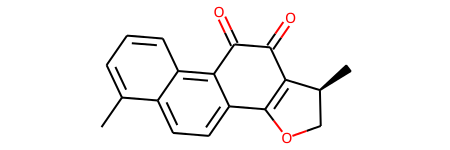

In [1228]:
M4 = mol_list [3]
M4

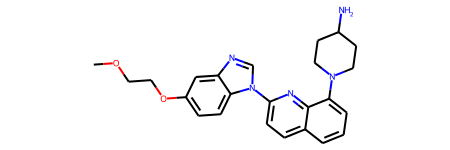

In [1229]:
M5 = mol_list [4]
M5

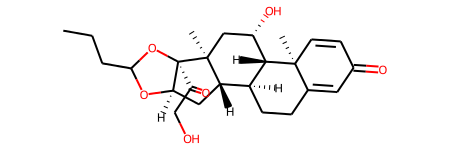

In [1230]:
M6 = mol_list [5]
M6

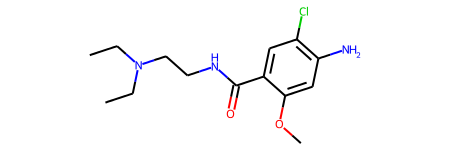

In [1231]:
M7 = mol_list [6]
M7

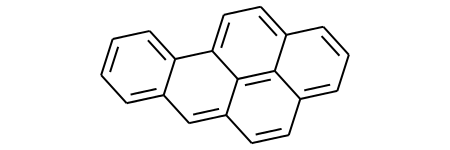

In [1232]:
M8 = mol_list [7]
M8

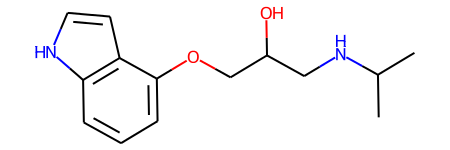

In [1233]:
M9 = mol_list [8]
M9

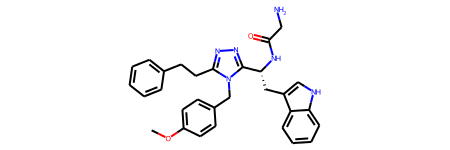

In [1234]:
M10 = mol_list [9]
M10

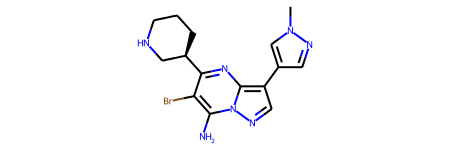

In [1235]:
M11 = mol_list [10]
M11

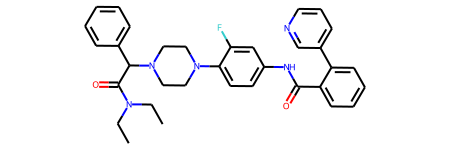

In [1236]:
M12 = mol_list [11]
M12

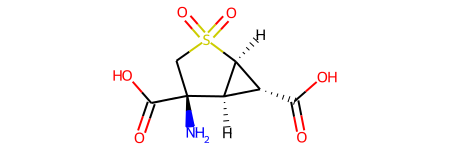

In [1237]:
M13 = mol_list [12]
M13

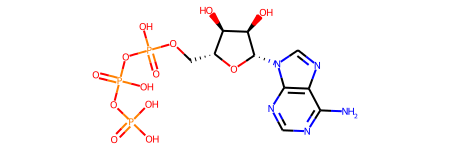

In [1238]:
M14 = mol_list [13]
M14

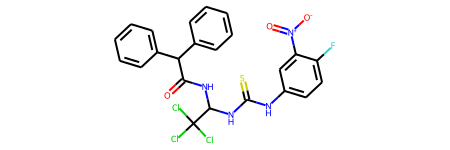

In [1239]:
M15 = mol_list [14]
M15

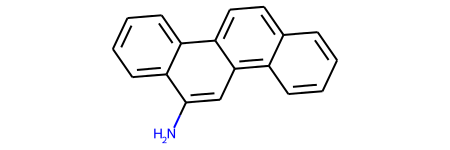

In [1240]:
M16 = mol_list [15]
M16

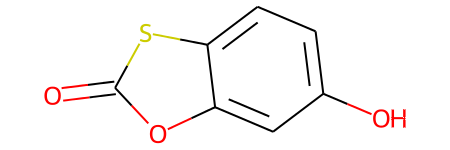

In [1241]:
M17 = mol_list [16]
M17

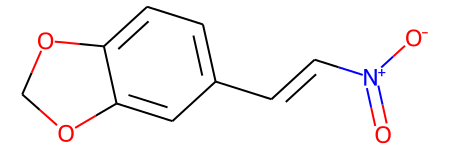

In [1242]:
M18 = mol_list [17]
M18

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


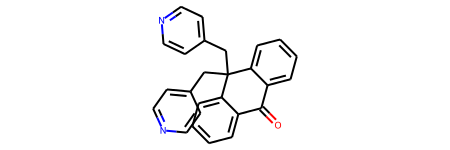

In [1243]:
M19 = mol_list [18]
M19

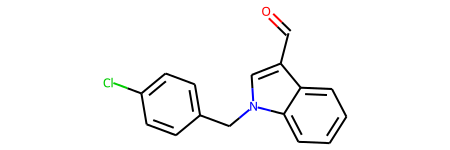

In [1244]:
M20 = mol_list [19]
M20

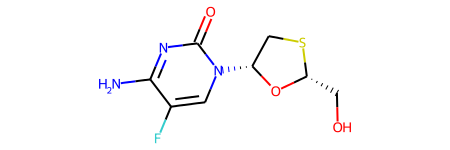

In [1245]:
M21 = mol_list [20]
M21

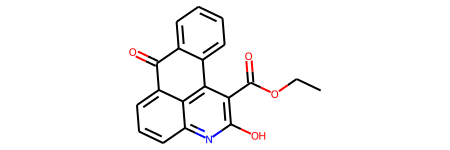

In [1246]:
M22 = mol_list [21]
M22

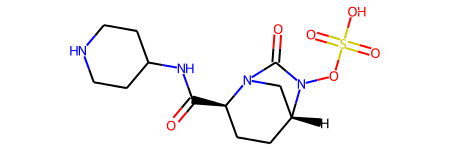

In [1247]:
M23 = mol_list [22]
M23

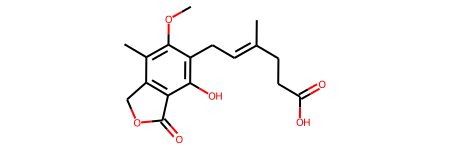

In [1248]:
M24 = mol_list [23]
M24

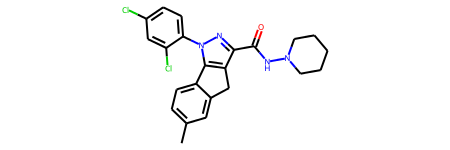

In [1249]:
M25 = mol_list [24]
M25

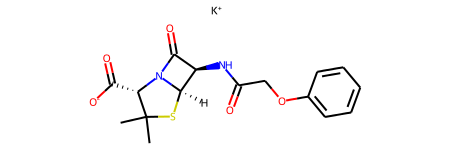

In [1250]:
M26 = mol_list [25]
M26

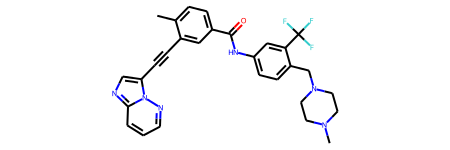

In [1251]:
M27 = mol_list [26]
M27

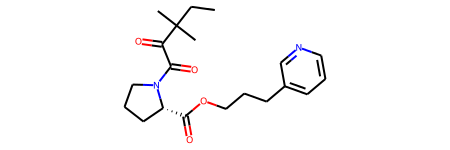

In [1252]:
M28 = mol_list [27]
M28

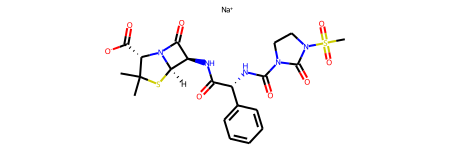

In [1253]:
M29 = mol_list [28]
M29

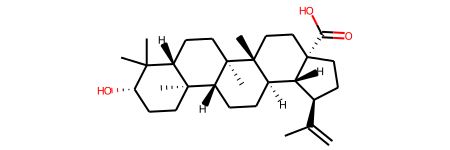

In [1254]:
M30 = mol_list [29]
M30

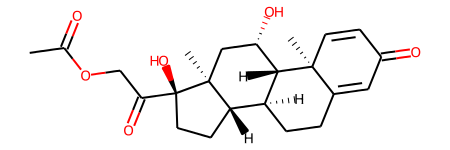

In [1255]:
M31 = mol_list [30]
M31

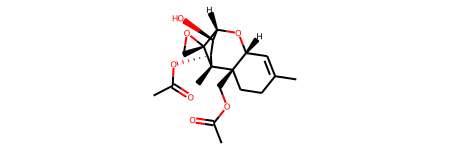

In [1256]:
M32 = mol_list [31]
M32

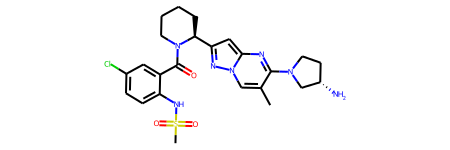

In [1257]:
M33 = mol_list [32]
M33

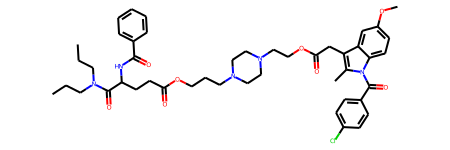

In [1258]:
M34 = mol_list [33]
M34

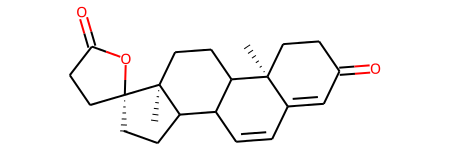

In [1259]:
M35 = mol_list [34]
M35

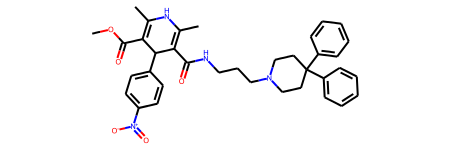

In [1260]:
M36 = mol_list [35]
M36

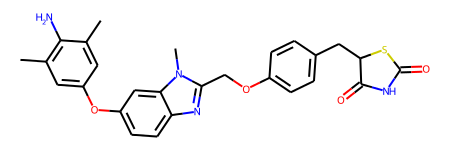

In [1261]:
M37= mol_list [36]
M37

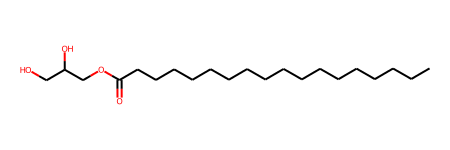

In [1262]:
M38= mol_list [37]
M38

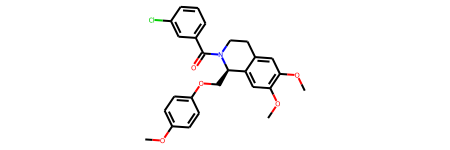

In [1263]:
M39= mol_list [38]
M39

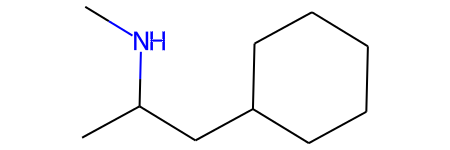

In [1264]:
M40= mol_list [39]
M40

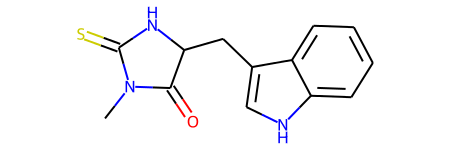

In [1265]:
M41= mol_list [40]
M41

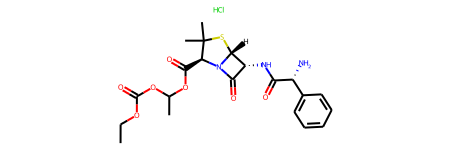

In [1266]:
M42= mol_list [41]
M42

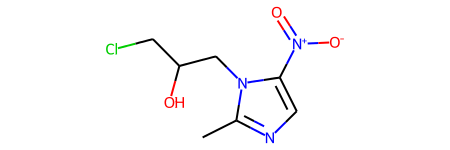

In [1267]:
M43= mol_list [42]
M43

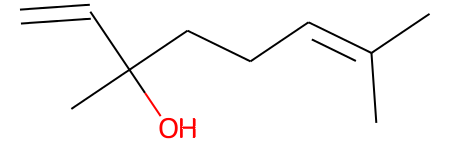

In [1268]:
M44= mol_list [43]
M44

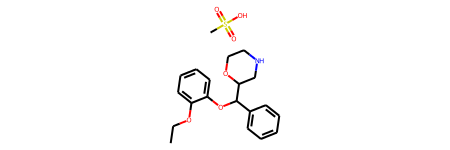

In [1269]:
M45= mol_list [44]
M45

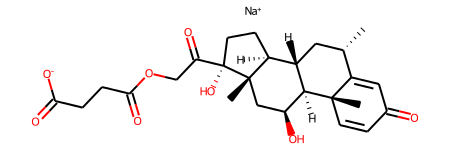

In [1270]:
M46= mol_list [45]
M46

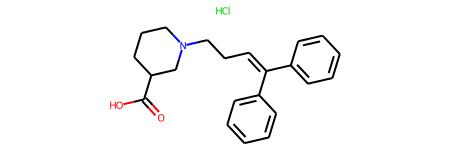

In [1271]:
M47= mol_list [46]
M47

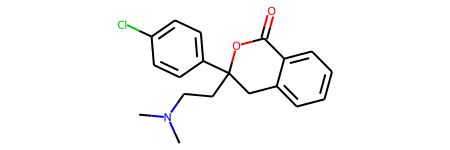

In [1272]:
M48= mol_list [47]
M48

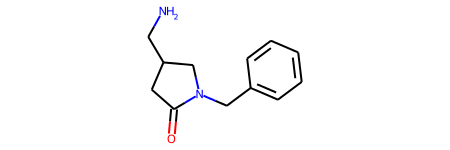

In [1273]:
M49= mol_list [48]
M49

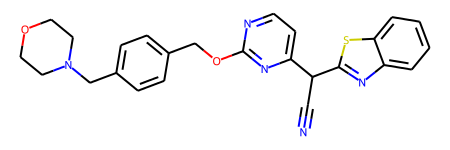

In [1274]:
M50= mol_list [49]
M50

In [1275]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[15,
 33,
 36,
 64,
 80,
 114,
 121,
 128,
 136,
 175,
 184,
 191,
 236,
 350,
 356,
 381,
 389,
 393,
 417,
 422,
 429,
 456,
 458,
 486,
 498,
 523,
 596,
 650,
 653,
 656,
 668,
 698,
 703,
 726,
 736,
 742,
 767,
 792,
 798,
 802,
 804,
 807,
 809,
 818,
 825,
 847,
 849,
 875,
 887,
 893,
 904,
 926,
 935,
 950,
 954,
 967,
 990,
 993]

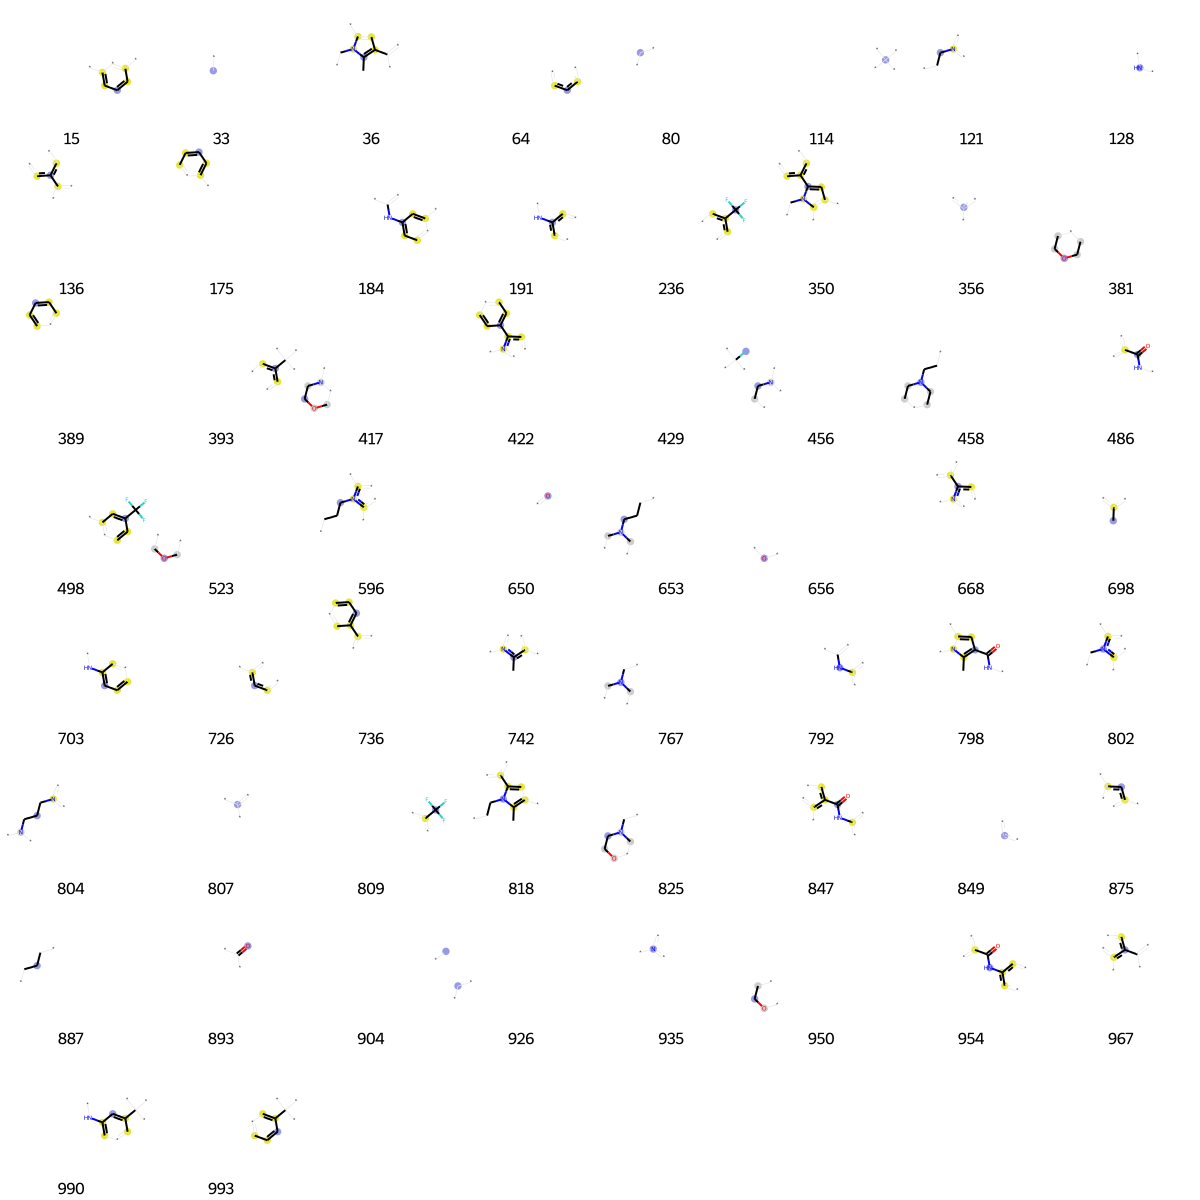

In [1276]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [1277]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[1,
 3,
 25,
 33,
 64,
 80,
 86,
 94,
 118,
 136,
 144,
 156,
 175,
 222,
 227,
 238,
 271,
 273,
 281,
 294,
 314,
 329,
 356,
 358,
 366,
 367,
 428,
 482,
 526,
 561,
 599,
 612,
 623,
 650,
 658,
 659,
 662,
 675,
 694,
 695,
 698,
 720,
 723,
 725,
 726,
 764,
 789,
 794,
 807,
 846,
 849,
 863,
 864,
 875,
 876,
 879,
 935,
 946,
 953,
 975,
 991,
 1009,
 1014,
 1020]

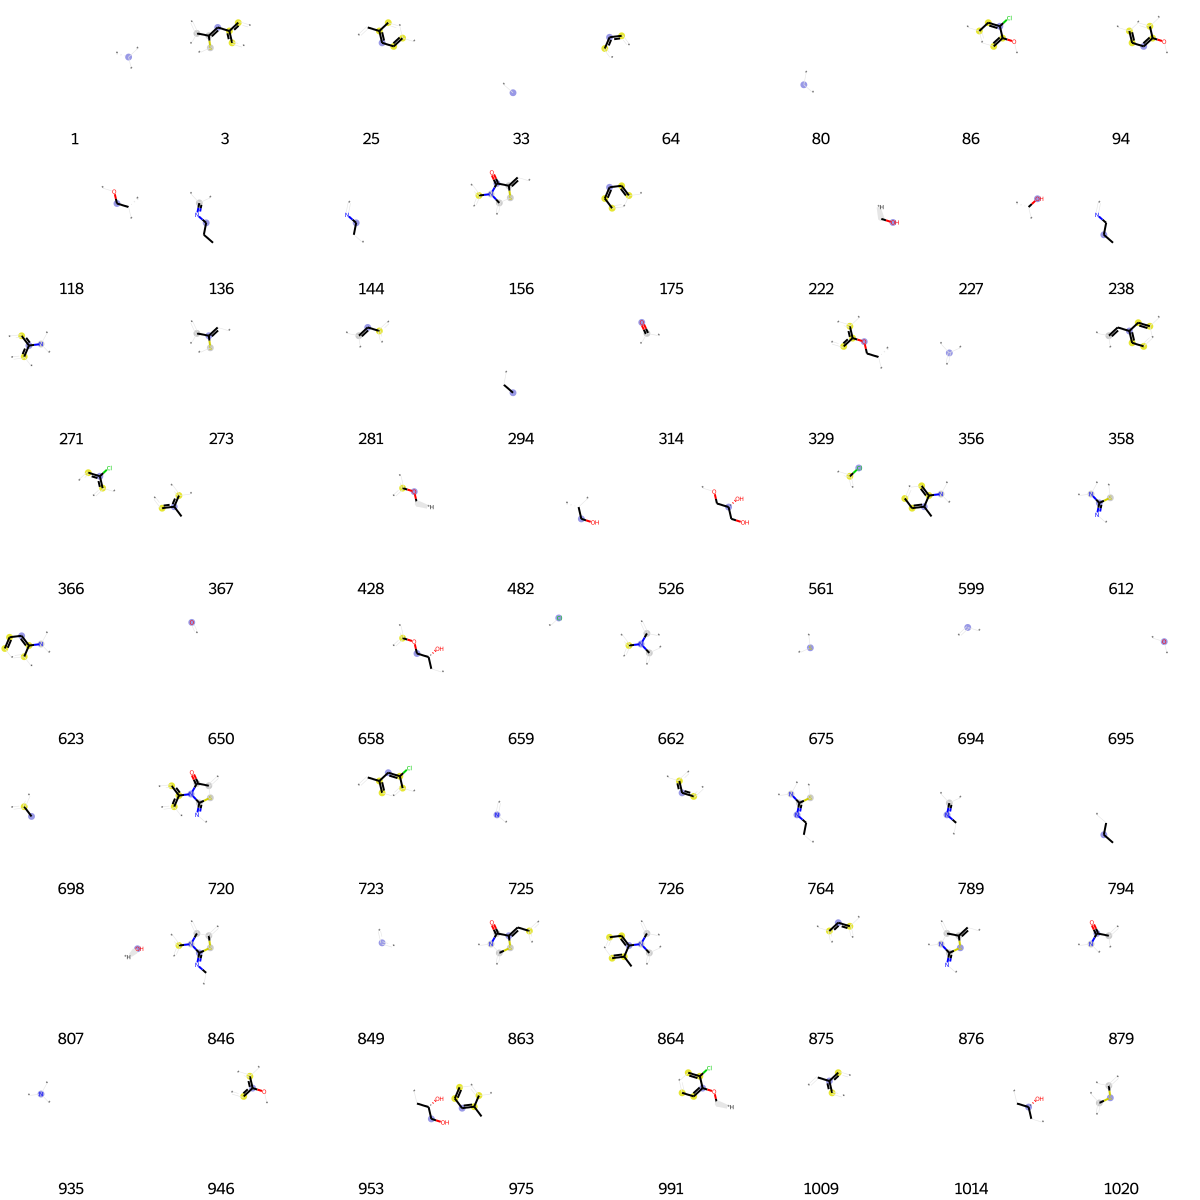

In [1278]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1279]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[15,
 33,
 64,
 72,
 128,
 139,
 184,
 191,
 200,
 278,
 288,
 289,
 355,
 356,
 361,
 367,
 486,
 526,
 541,
 578,
 609,
 628,
 641,
 650,
 658,
 667,
 673,
 676,
 698,
 726,
 745,
 754,
 771,
 792,
 807,
 843,
 849,
 875,
 881,
 893,
 947,
 954,
 961]

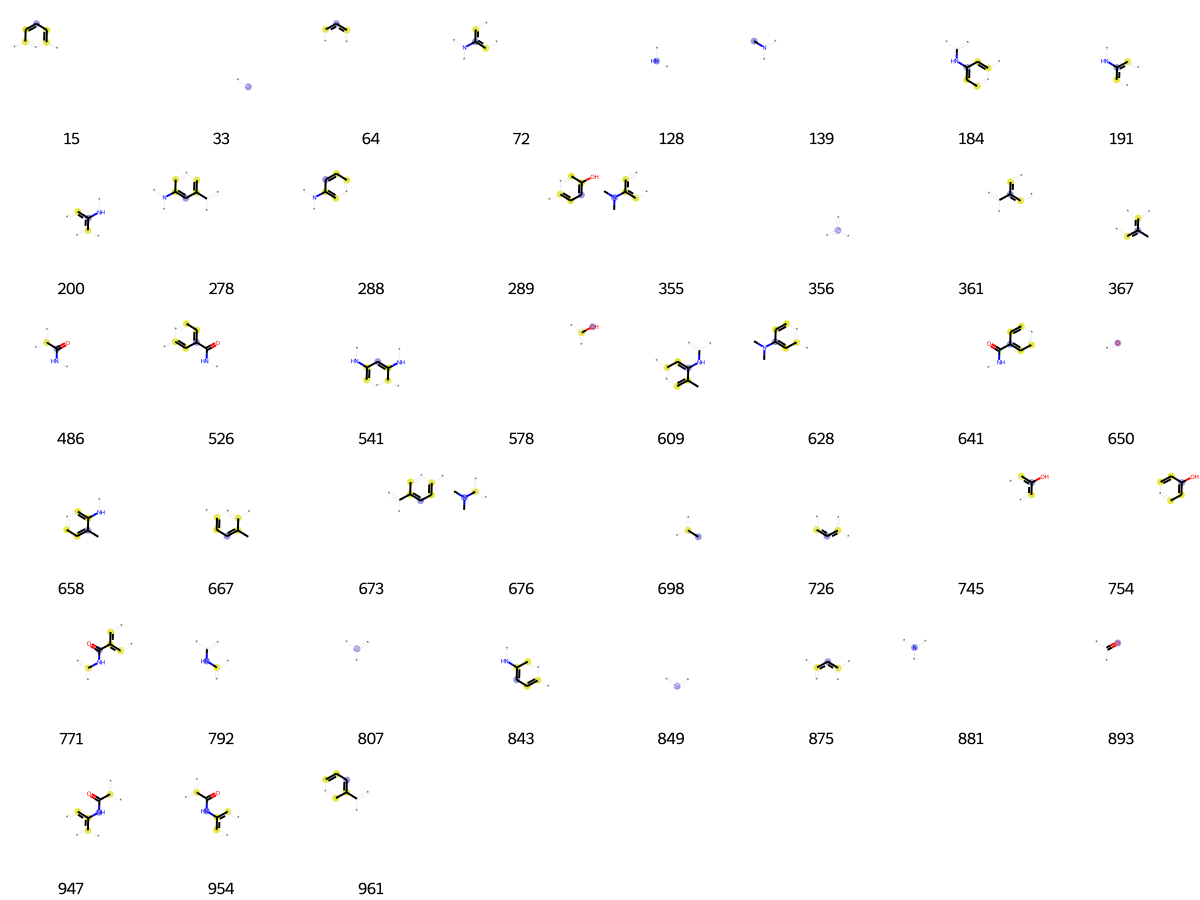

In [1280]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [1281]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[15,
 33,
 64,
 65,
 118,
 166,
 232,
 285,
 298,
 312,
 314,
 333,
 352,
 356,
 367,
 426,
 441,
 452,
 480,
 541,
 549,
 558,
 650,
 656,
 680,
 698,
 709,
 723,
 726,
 746,
 784,
 849,
 887,
 899,
 901,
 926,
 975,
 1019]

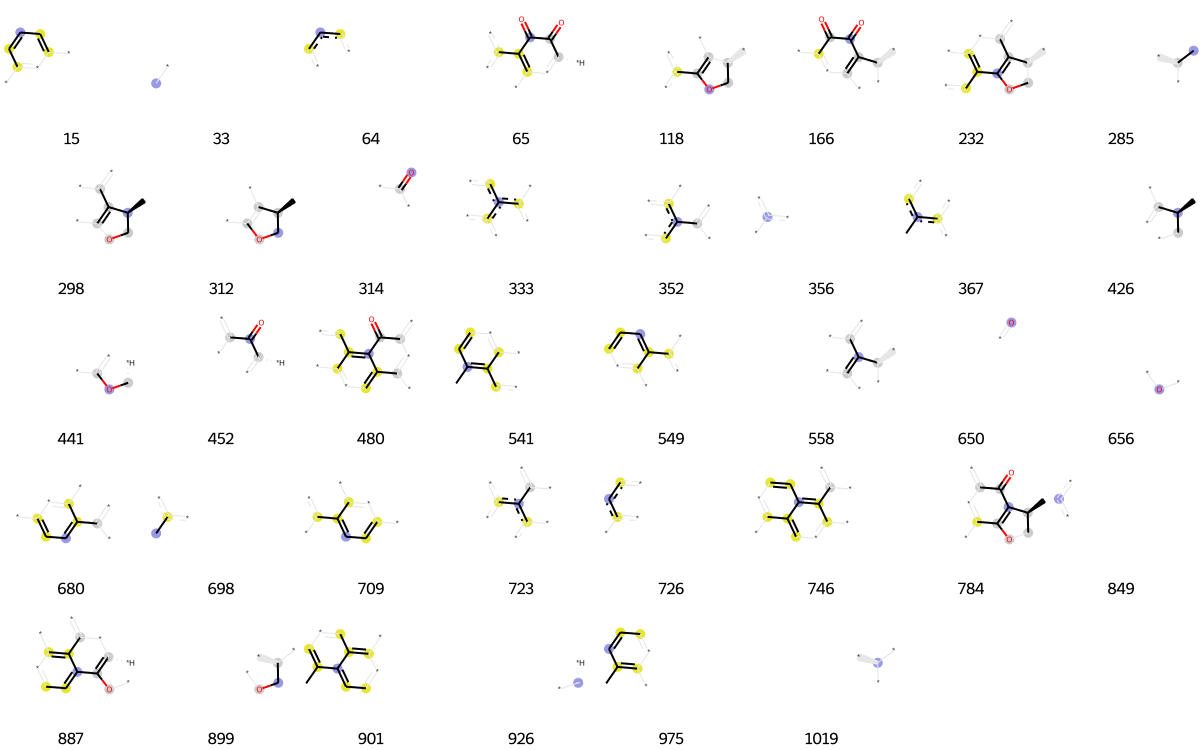

In [1282]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [1283]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[6,
 10,
 13,
 15,
 29,
 32,
 33,
 45,
 63,
 64,
 73,
 80,
 147,
 203,
 231,
 260,
 271,
 301,
 312,
 322,
 335,
 356,
 378,
 379,
 407,
 428,
 449,
 456,
 477,
 486,
 527,
 564,
 577,
 623,
 635,
 656,
 676,
 677,
 695,
 700,
 704,
 718,
 726,
 808,
 831,
 841,
 849,
 875,
 893,
 926,
 932,
 935,
 954,
 997,
 1000,
 1005,
 1019]

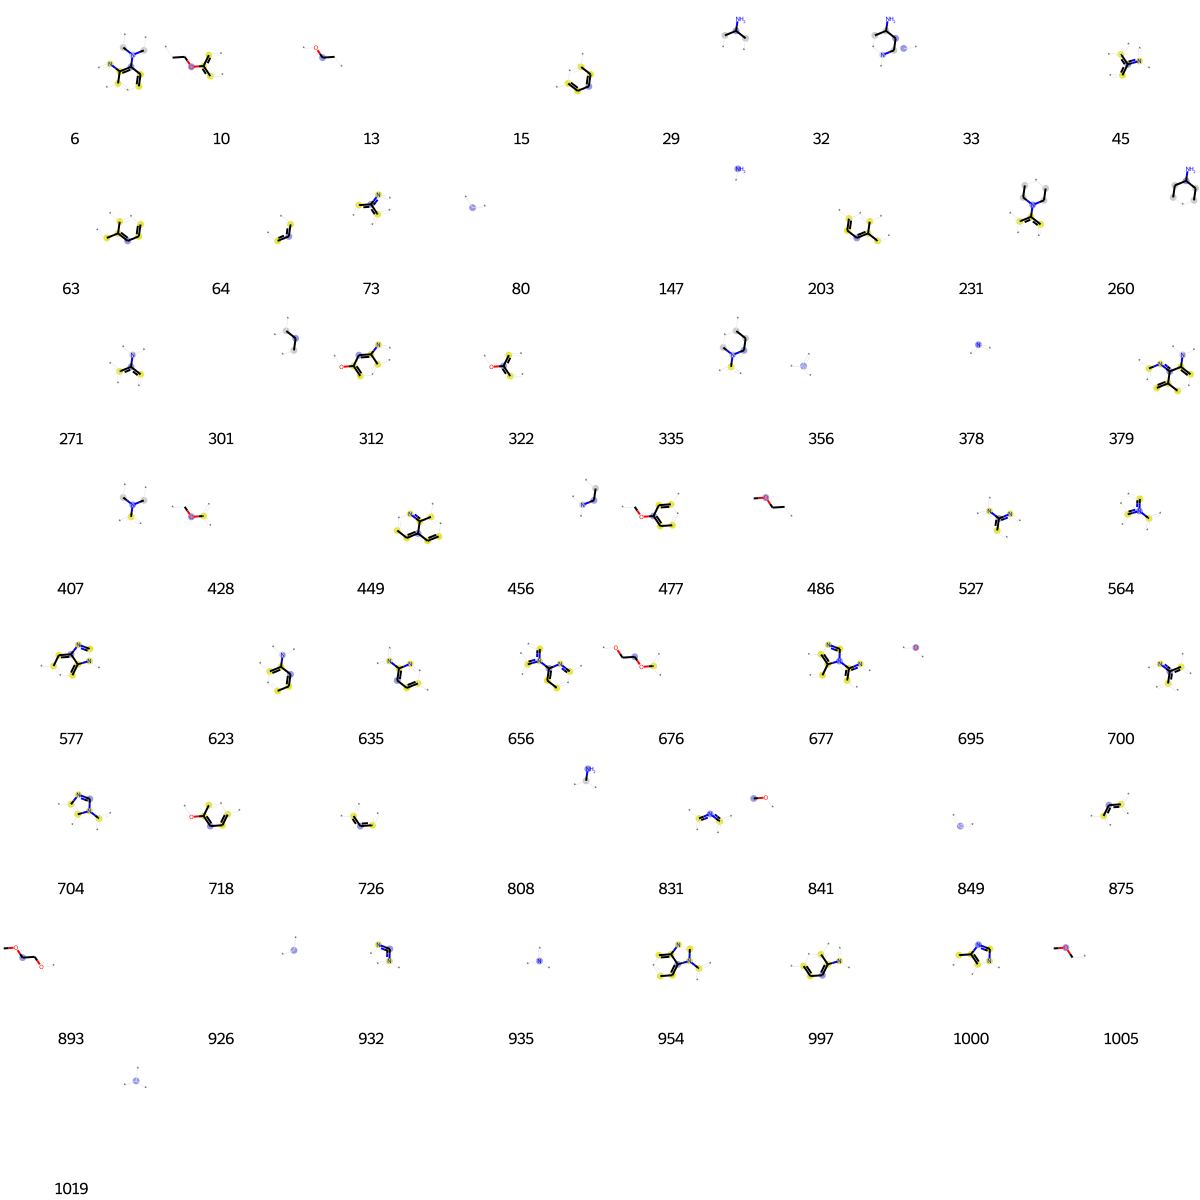

In [1284]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [1285]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[33,
 36,
 46,
 51,
 78,
 80,
 84,
 90,
 97,
 124,
 162,
 182,
 199,
 222,
 233,
 240,
 250,
 261,
 268,
 294,
 298,
 301,
 314,
 356,
 371,
 373,
 404,
 408,
 412,
 465,
 504,
 519,
 547,
 588,
 622,
 640,
 650,
 656,
 658,
 676,
 679,
 703,
 706,
 714,
 787,
 794,
 807,
 832,
 848,
 849,
 852,
 893,
 897,
 914,
 926,
 967,
 973,
 991,
 997,
 1009,
 1019]

In [1286]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[8,
 33,
 50,
 71,
 80,
 128,
 147,
 197,
 230,
 249,
 251,
 253,
 280,
 293,
 294,
 317,
 356,
 366,
 433,
 486,
 512,
 561,
 586,
 620,
 650,
 659,
 667,
 695,
 738,
 807,
 841,
 849,
 875,
 881,
 893,
 910,
 927,
 932,
 946,
 957,
 967]

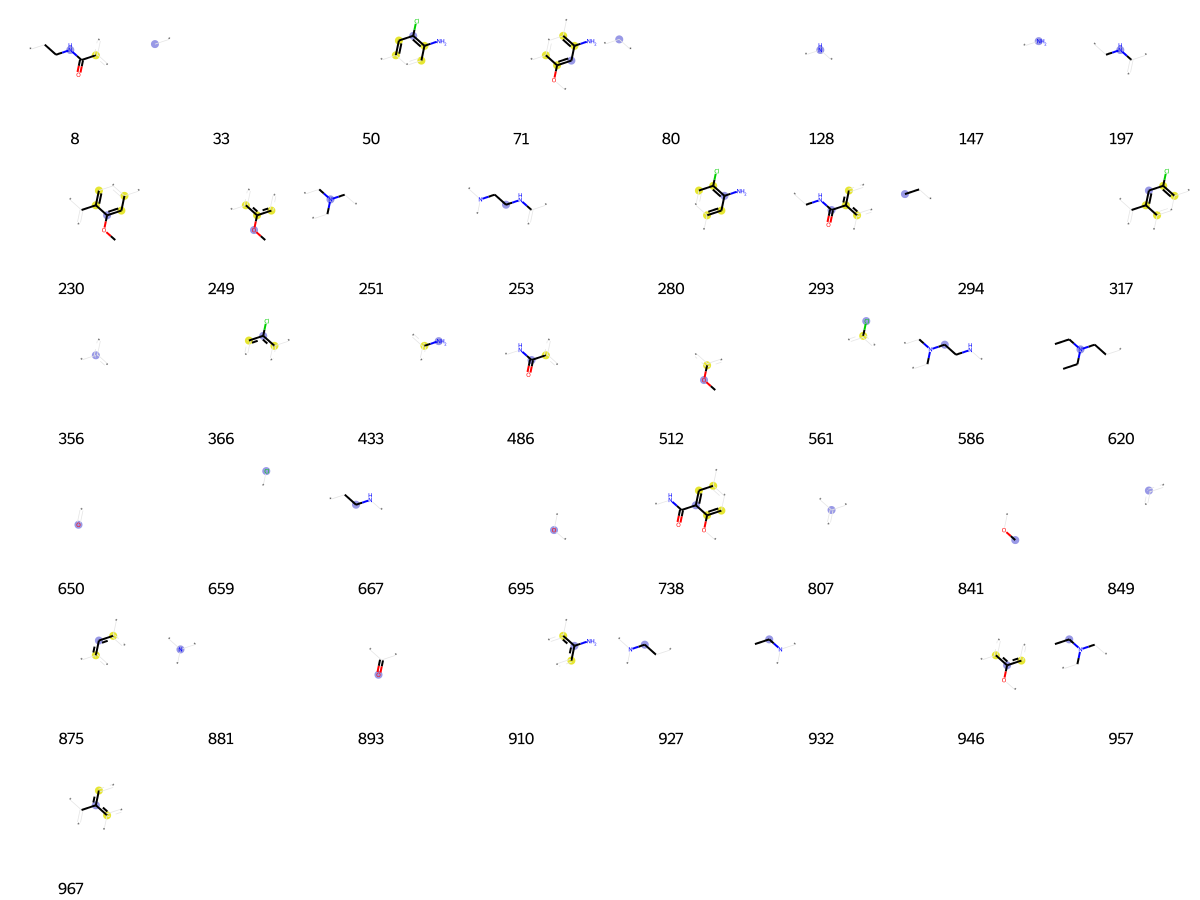

In [1287]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [1288]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[15,
 63,
 64,
 175,
 199,
 203,
 320,
 333,
 356,
 549,
 641,
 701,
 709,
 725,
 726,
 831,
 836,
 849,
 875,
 888,
 960,
 1001]

In [1289]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[1,
 2,
 4,
 15,
 33,
 64,
 80,
 90,
 118,
 119,
 128,
 169,
 227,
 283,
 328,
 329,
 333,
 356,
 386,
 416,
 428,
 430,
 482,
 522,
 550,
 606,
 658,
 695,
 711,
 726,
 759,
 782,
 806,
 807,
 849,
 882,
 946,
 1006,
 1014]

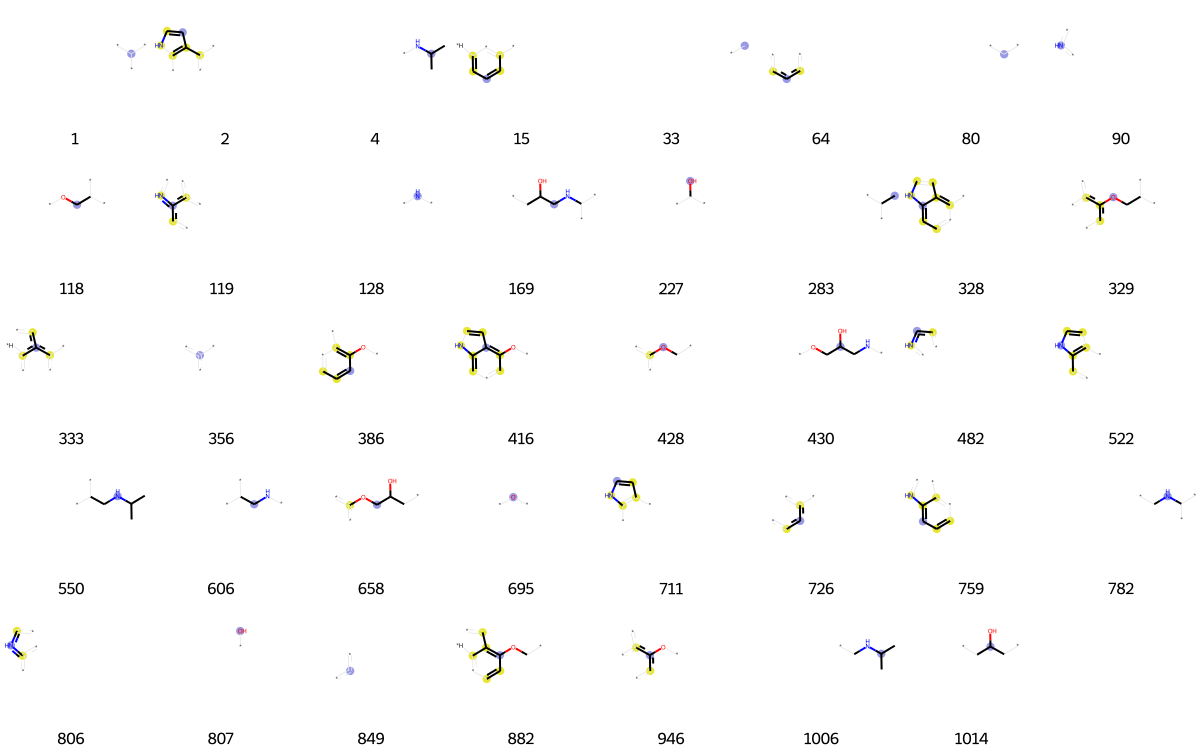

In [1290]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1291]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[1,
 21,
 27,
 33,
 41,
 42,
 51,
 64,
 79,
 80,
 90,
 97,
 102,
 117,
 119,
 128,
 140,
 147,
 175,
 219,
 246,
 268,
 291,
 310,
 318,
 322,
 325,
 328,
 333,
 335,
 356,
 364,
 378,
 389,
 493,
 499,
 512,
 530,
 549,
 583,
 650,
 659,
 695,
 718,
 726,
 730,
 741,
 742,
 759,
 777,
 781,
 802,
 806,
 807,
 831,
 841,
 849,
 855,
 893,
 913,
 923,
 935,
 946,
 981,
 983]

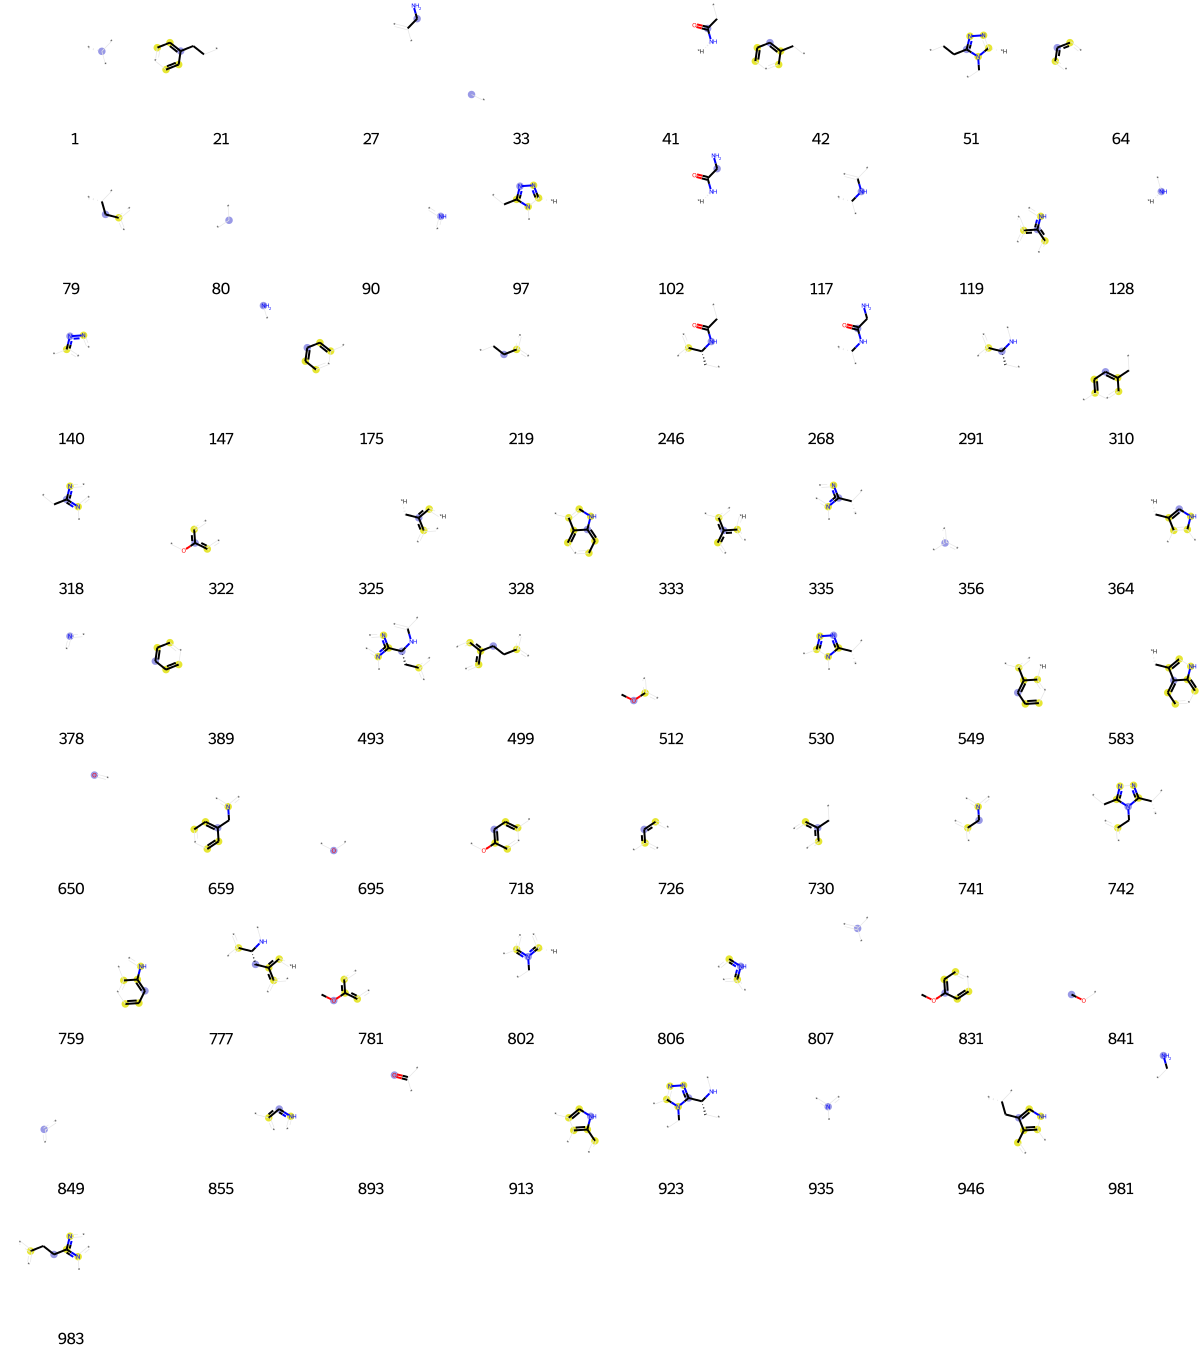

In [1292]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1293]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[4,
 33,
 43,
 56,
 75,
 90,
 104,
 105,
 121,
 136,
 147,
 169,
 275,
 284,
 301,
 305,
 327,
 352,
 356,
 373,
 378,
 412,
 433,
 434,
 464,
 470,
 511,
 565,
 581,
 607,
 640,
 649,
 666,
 672,
 712,
 715,
 728,
 738,
 742,
 818,
 831,
 849,
 873,
 905,
 919,
 926,
 935,
 940,
 976,
 1019]

In [1294]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 19,
 27,
 33,
 54,
 64,
 80,
 128,
 136,
 164,
 175,
 184,
 191,
 231,
 241,
 257,
 271,
 294,
 341,
 352,
 356,
 371,
 378,
 389,
 407,
 423,
 437,
 456,
 460,
 484,
 486,
 501,
 511,
 557,
 562,
 579,
 603,
 623,
 650,
 654,
 687,
 699,
 726,
 736,
 792,
 807,
 816,
 818,
 842,
 843,
 847,
 849,
 875,
 881,
 891,
 893,
 904,
 906,
 926,
 932,
 935,
 954,
 967,
 978,
 980,
 984,
 1008]

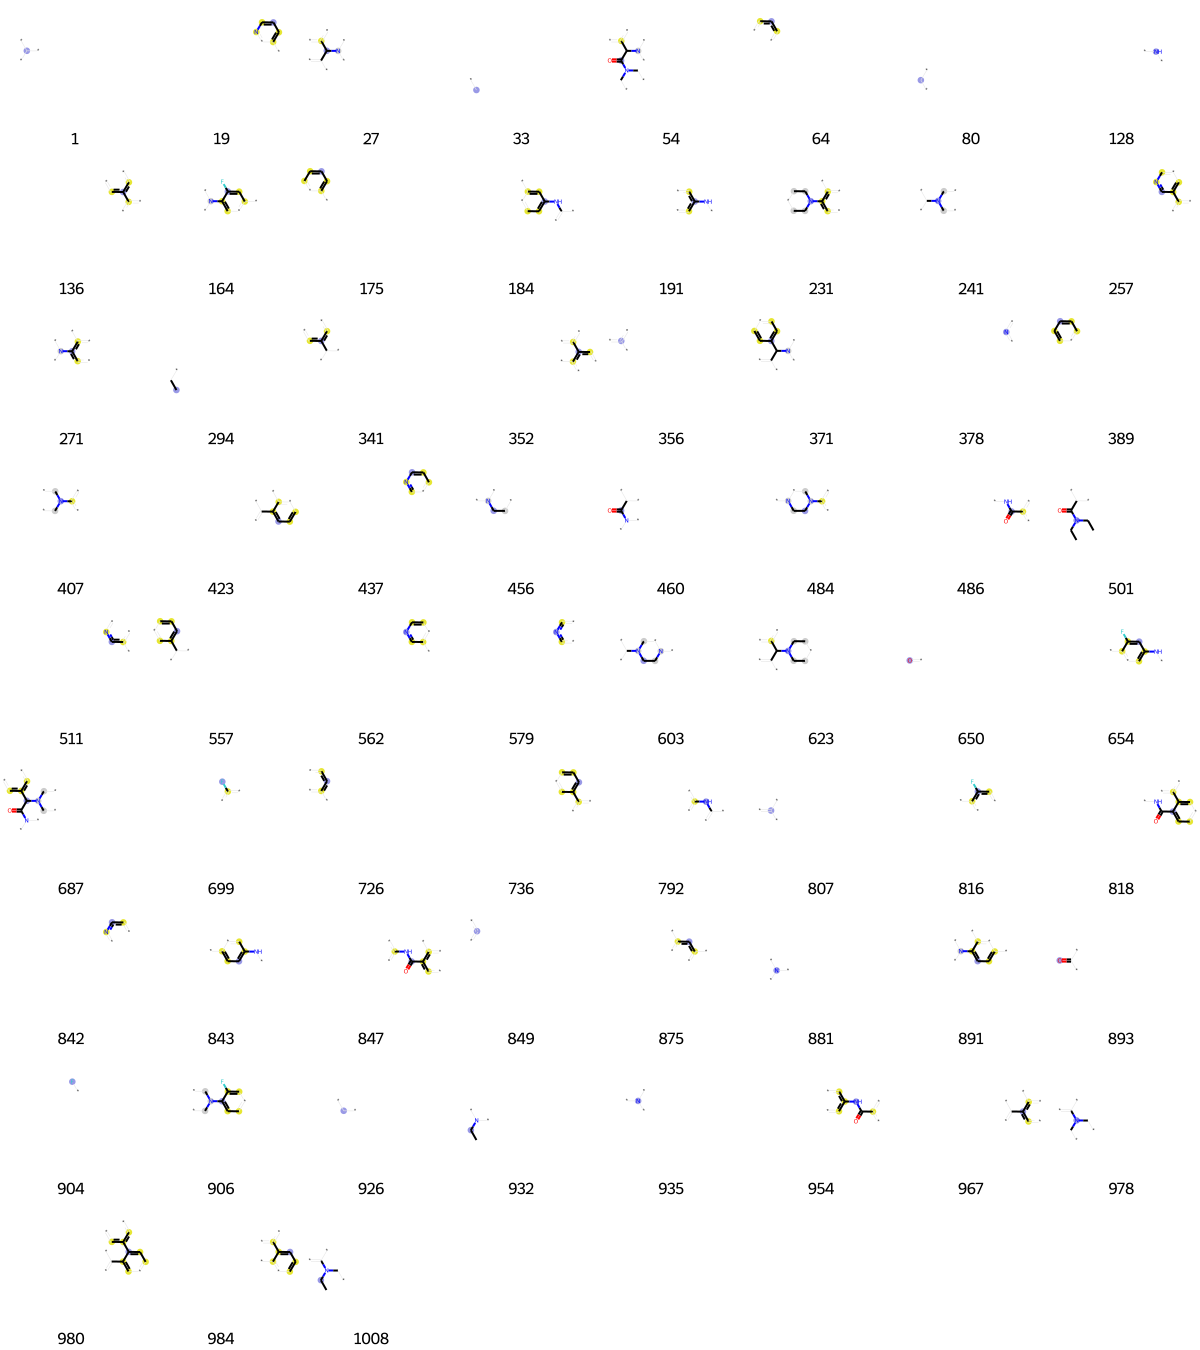

In [1295]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1296]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[36,
 64,
 147,
 184,
 207,
 335,
 350,
 381,
 389,
 398,
 407,
 469,
 548,
 586,
 593,
 632,
 650,
 720,
 787,
 807,
 875,
 893,
 926,
 944,
 1009,
 1019]

In [1297]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[9,
 52,
 71,
 75,
 80,
 112,
 147,
 152,
 192,
 194,
 209,
 229,
 233,
 356,
 378,
 386,
 428,
 433,
 435,
 454,
 463,
 486,
 489,
 519,
 548,
 577,
 610,
 650,
 656,
 672,
 692,
 695,
 700,
 708,
 786,
 795,
 807,
 810,
 814,
 820,
 849,
 854,
 863,
 897,
 932,
 935,
 962,
 980,
 995,
 1019,
 1020]

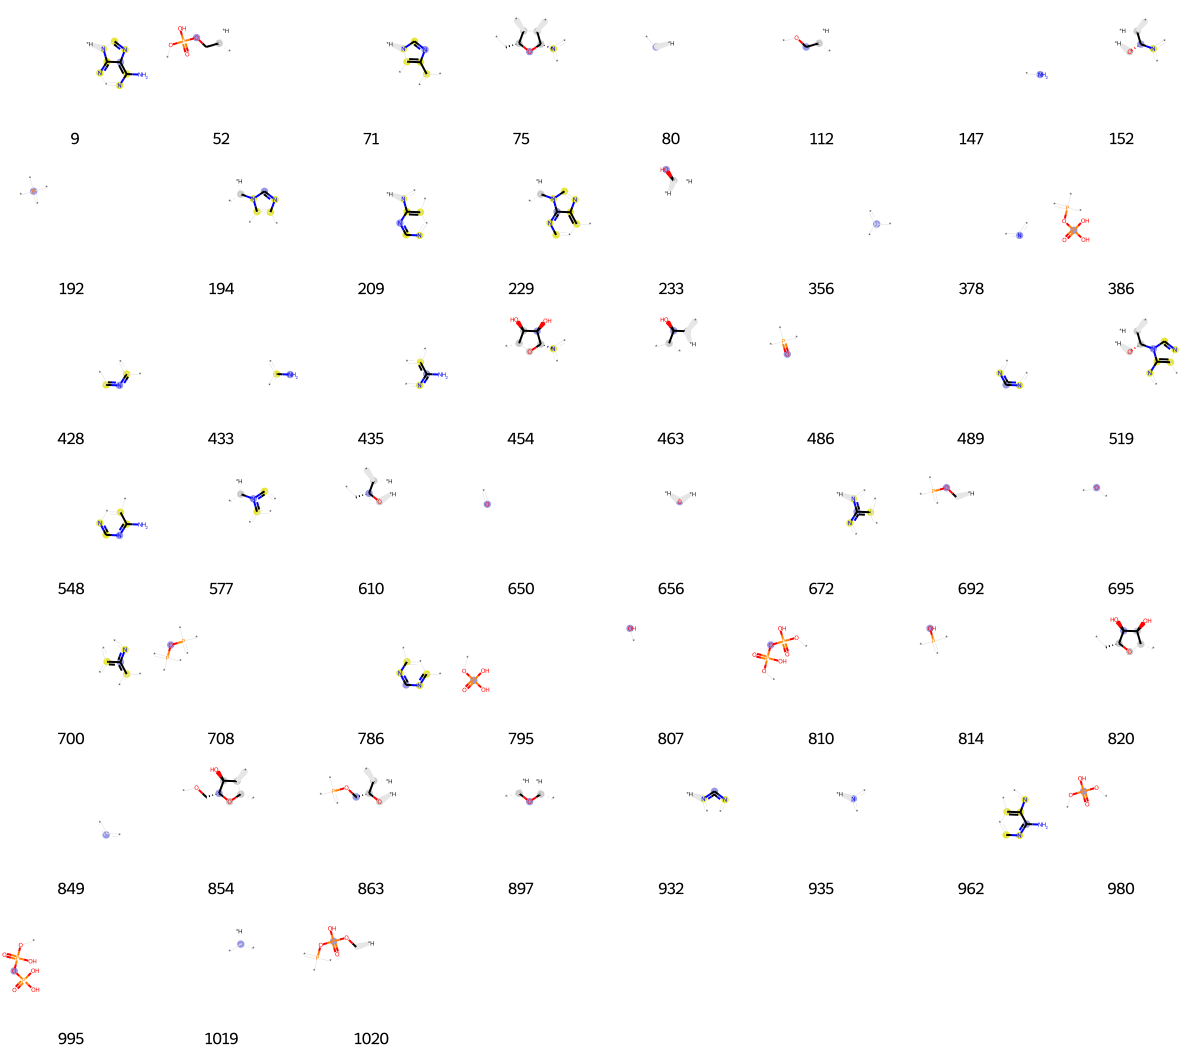

In [1298]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1299]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 64,
 97,
 110,
 114,
 117,
 128,
 171,
 175,
 184,
 191,
 209,
 216,
 237,
 284,
 314,
 341,
 354,
 356,
 388,
 389,
 412,
 443,
 461,
 557,
 558,
 573,
 605,
 650,
 659,
 679,
 699,
 715,
 716,
 726,
 753,
 757,
 792,
 803,
 807,
 816,
 838,
 843,
 849,
 875,
 893,
 904,
 936,
 939,
 954,
 1014]

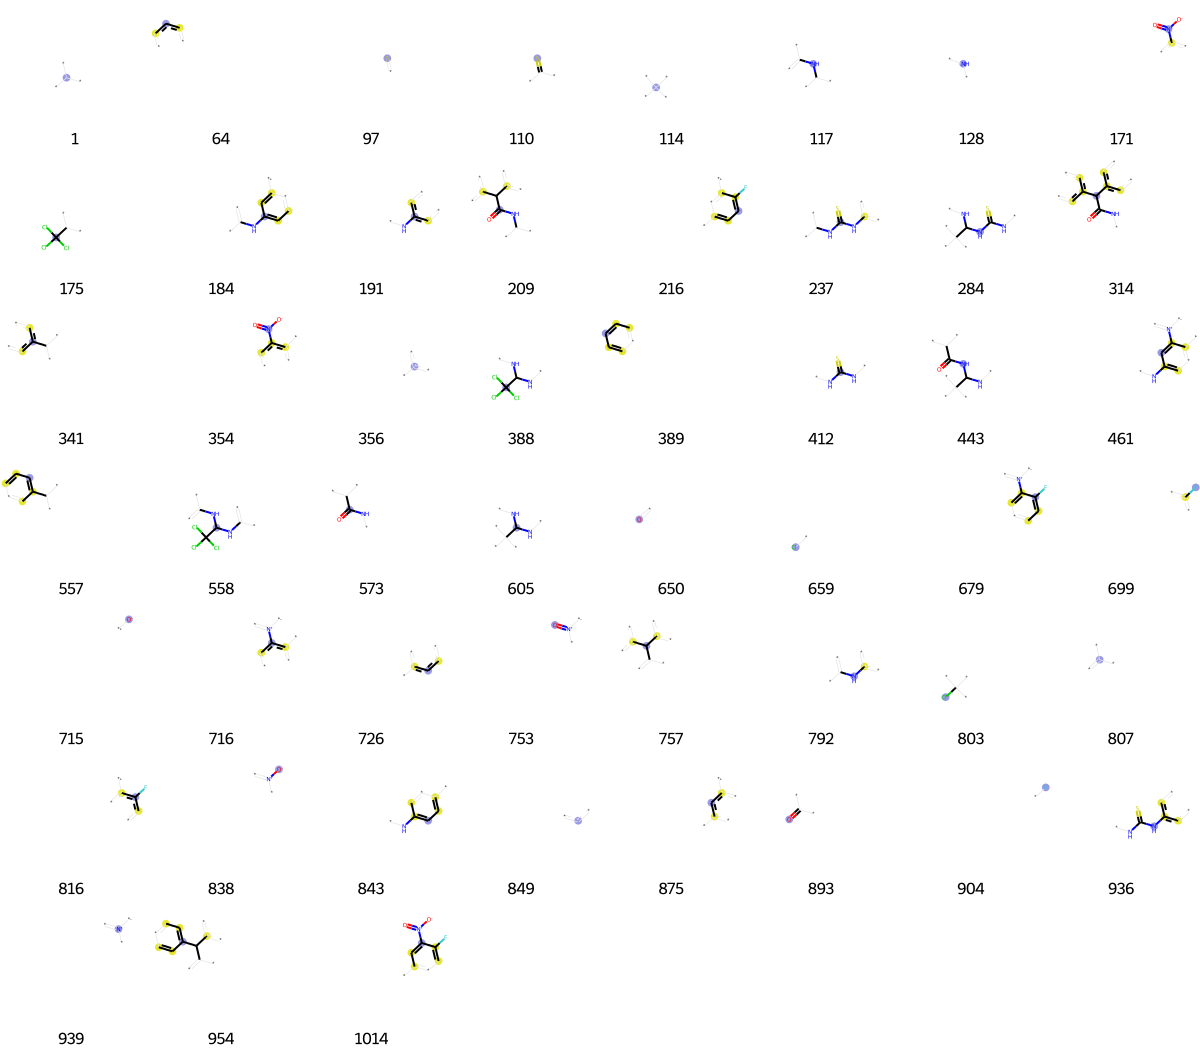

In [1300]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1301]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[63,
 64,
 80,
 137,
 147,
 175,
 203,
 327,
 333,
 338,
 345,
 356,
 433,
 549,
 641,
 709,
 726,
 767,
 831,
 849,
 875,
 910]

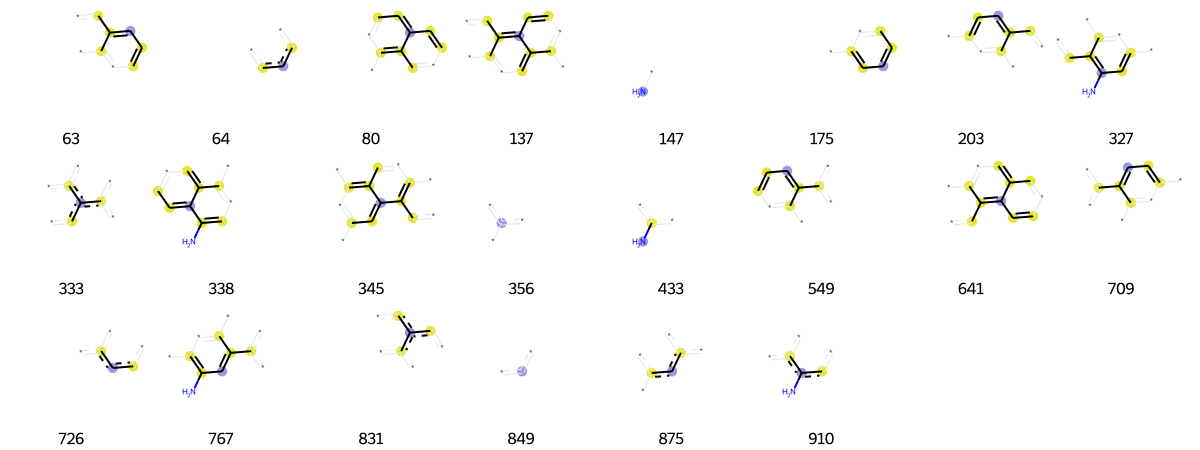

In [1302]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1303]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[120,
 157,
 162,
 249,
 289,
 314,
 356,
 381,
 435,
 472,
 578,
 580,
 650,
 656,
 675,
 726,
 745,
 758,
 784,
 807,
 818,
 849,
 875,
 885,
 901]

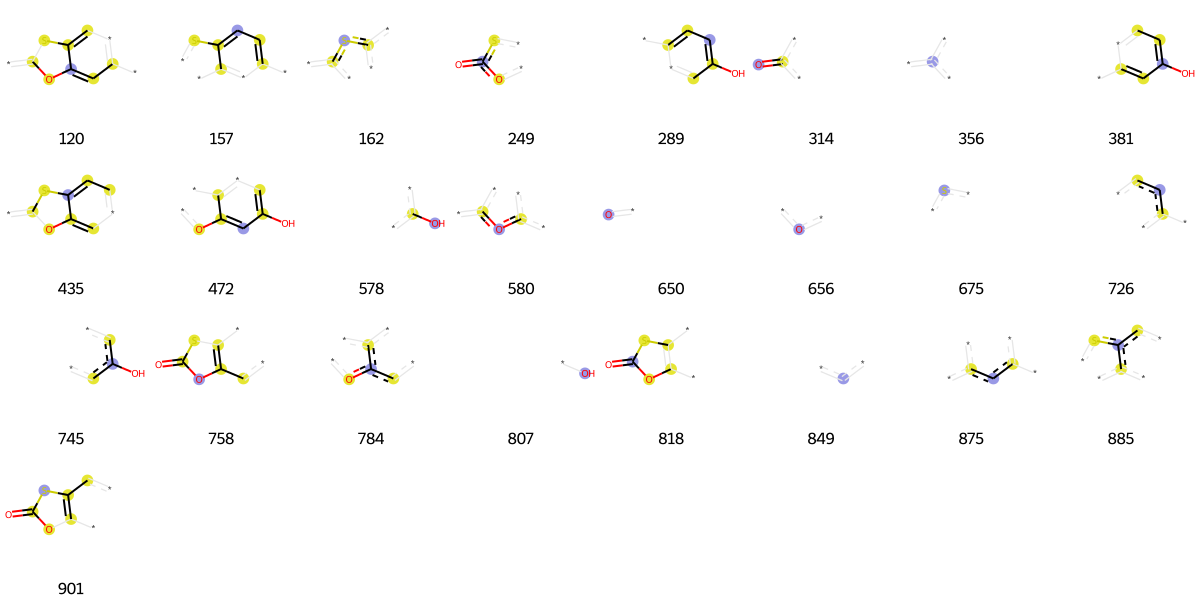

In [1304]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1305]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[10,
 11,
 25,
 48,
 174,
 265,
 325,
 356,
 365,
 441,
 455,
 623,
 650,
 656,
 694,
 715,
 726,
 738,
 753,
 776,
 835,
 838,
 839,
 849,
 875,
 881,
 926,
 939,
 1009,
 1017]

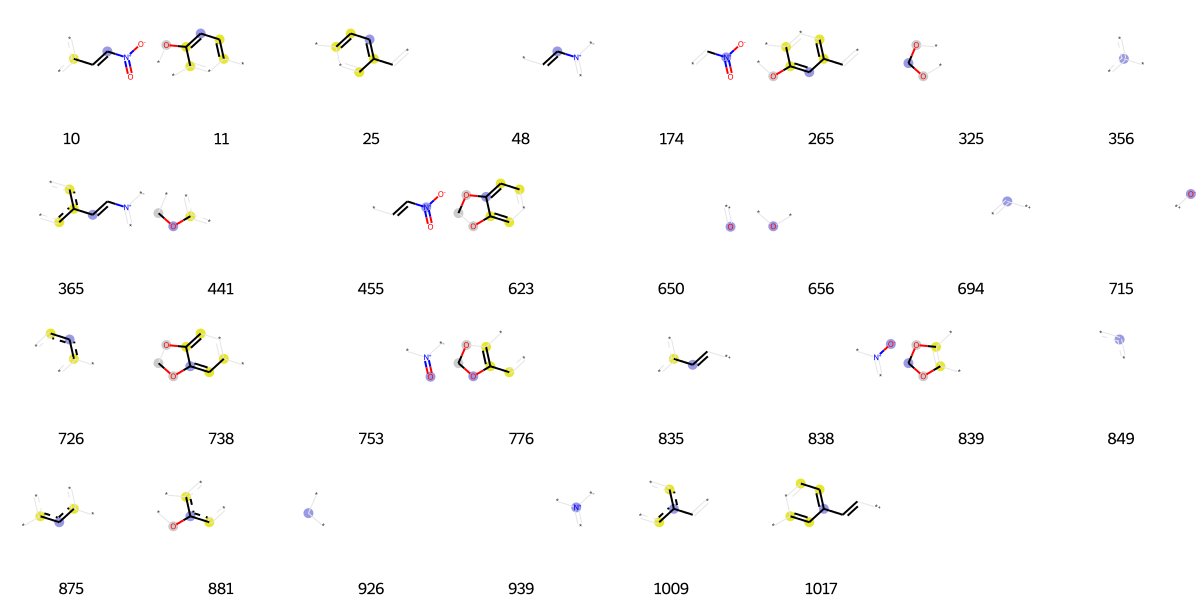

In [1306]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1307]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[36,
 64,
 80,
 175,
 184,
 224,
 286,
 314,
 352,
 356,
 378,
 383,
 421,
 436,
 452,
 493,
 573,
 579,
 650,
 710,
 726,
 730,
 832,
 842,
 849,
 901,
 956,
 984]

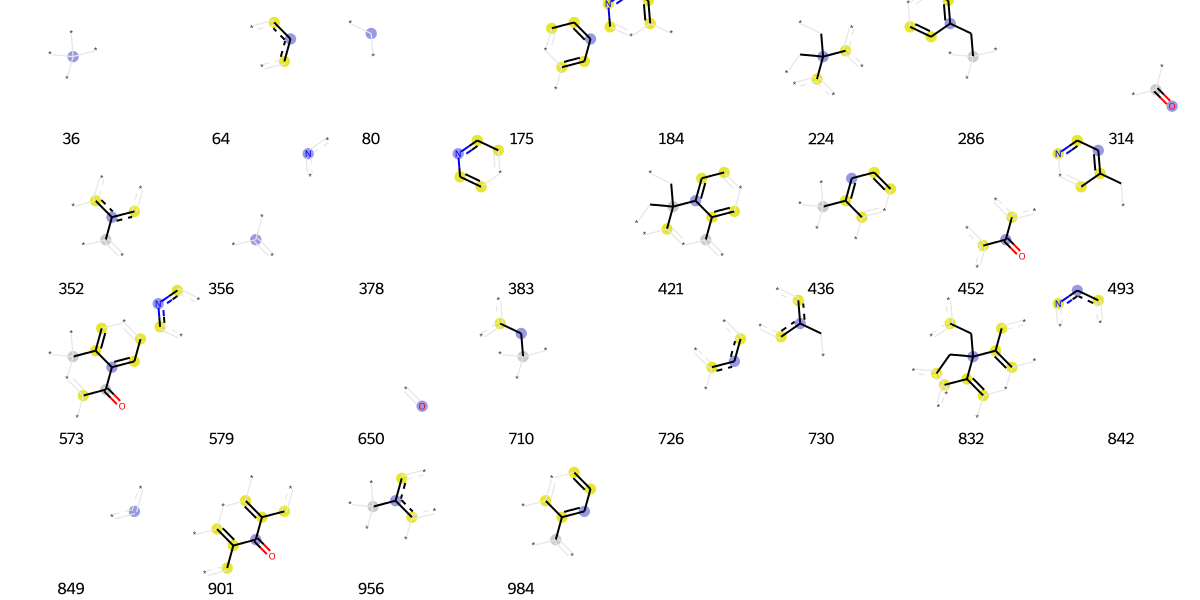

In [1308]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1309]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[39,
 45,
 46,
 64,
 80,
 132,
 175,
 216,
 261,
 271,
 310,
 333,
 356,
 431,
 455,
 464,
 479,
 549,
 561,
 650,
 659,
 694,
 726,
 730,
 741,
 799,
 816,
 849,
 906,
 935,
 952,
 961,
 1004]

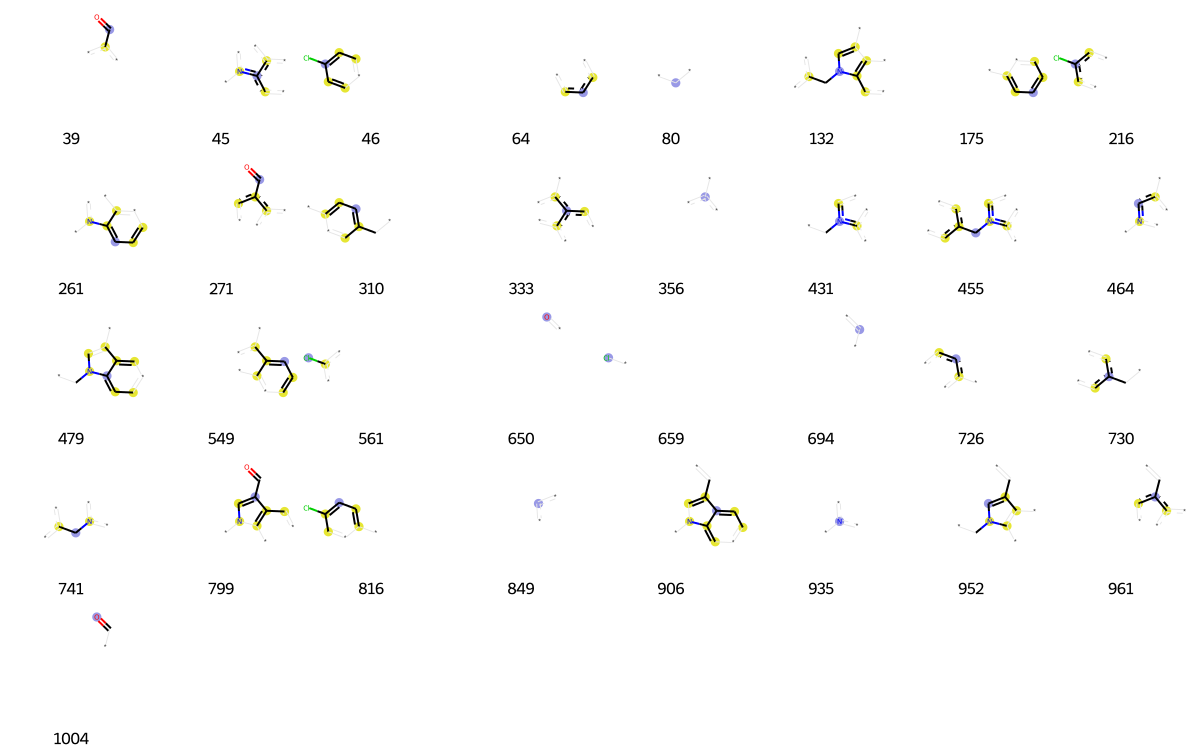

In [1310]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [1311]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[4,
 53,
 80,
 147,
 222,
 314,
 353,
 356,
 378,
 433,
 435,
 464,
 488,
 492,
 541,
 569,
 577,
 606,
 639,
 650,
 656,
 675,
 689,
 699,
 804,
 807,
 816,
 821,
 822,
 831,
 849,
 863,
 897,
 899,
 904,
 926,
 935,
 966,
 989,
 998,
 1019]

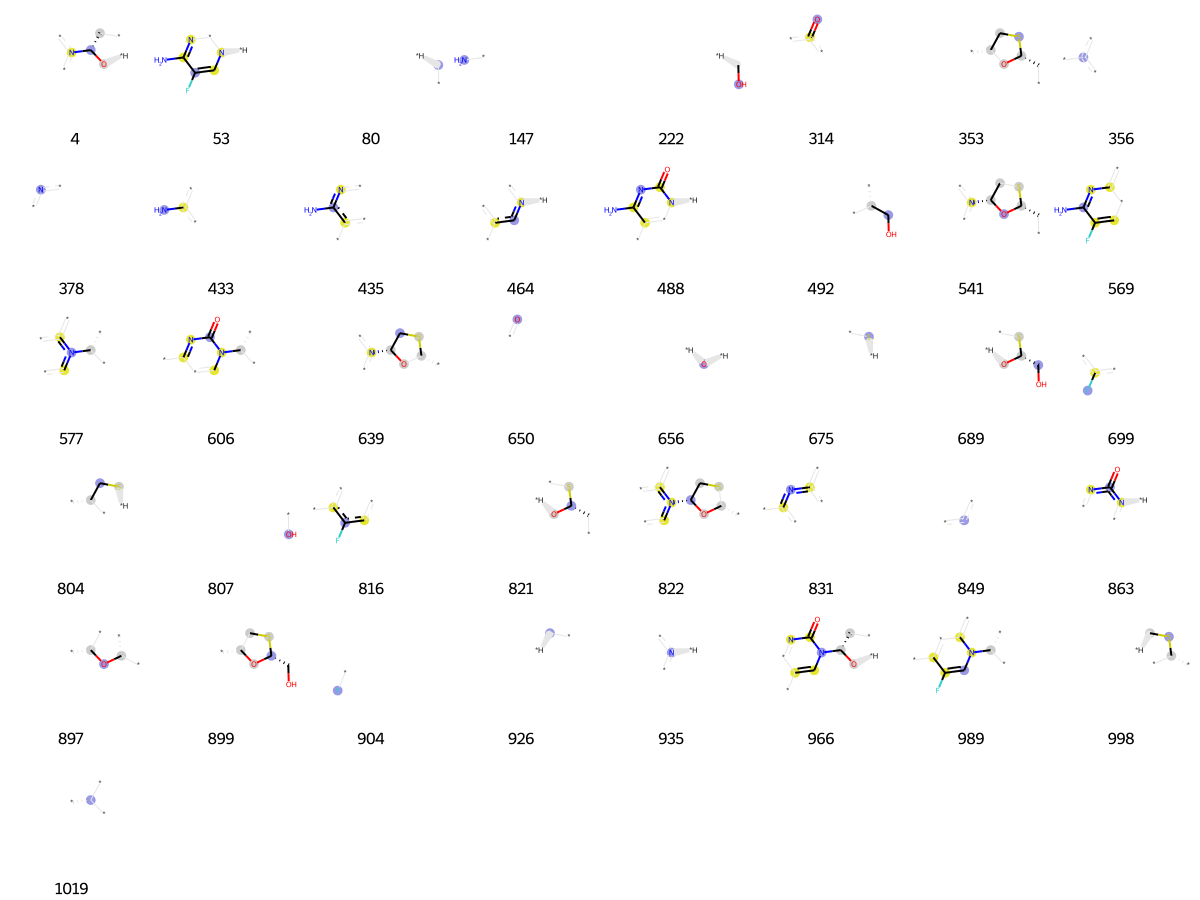

In [1312]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1313]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 15,
 26,
 33,
 54,
 64,
 73,
 80,
 106,
 145,
 147,
 175,
 214,
 249,
 289,
 294,
 314,
 352,
 356,
 378,
 431,
 432,
 452,
 536,
 545,
 578,
 586,
 650,
 695,
 698,
 723,
 726,
 759,
 807,
 831,
 849,
 854,
 893,
 901,
 911,
 960,
 984]

In [1314]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[17,
 79,
 90,
 92,
 110,
 125,
 128,
 155,
 240,
 284,
 285,
 301,
 305,
 314,
 318,
 338,
 350,
 356,
 386,
 387,
 452,
 492,
 531,
 574,
 592,
 610,
 631,
 635,
 650,
 684,
 689,
 695,
 739,
 750,
 807,
 886,
 892,
 893,
 905,
 923,
 926,
 935,
 1019]

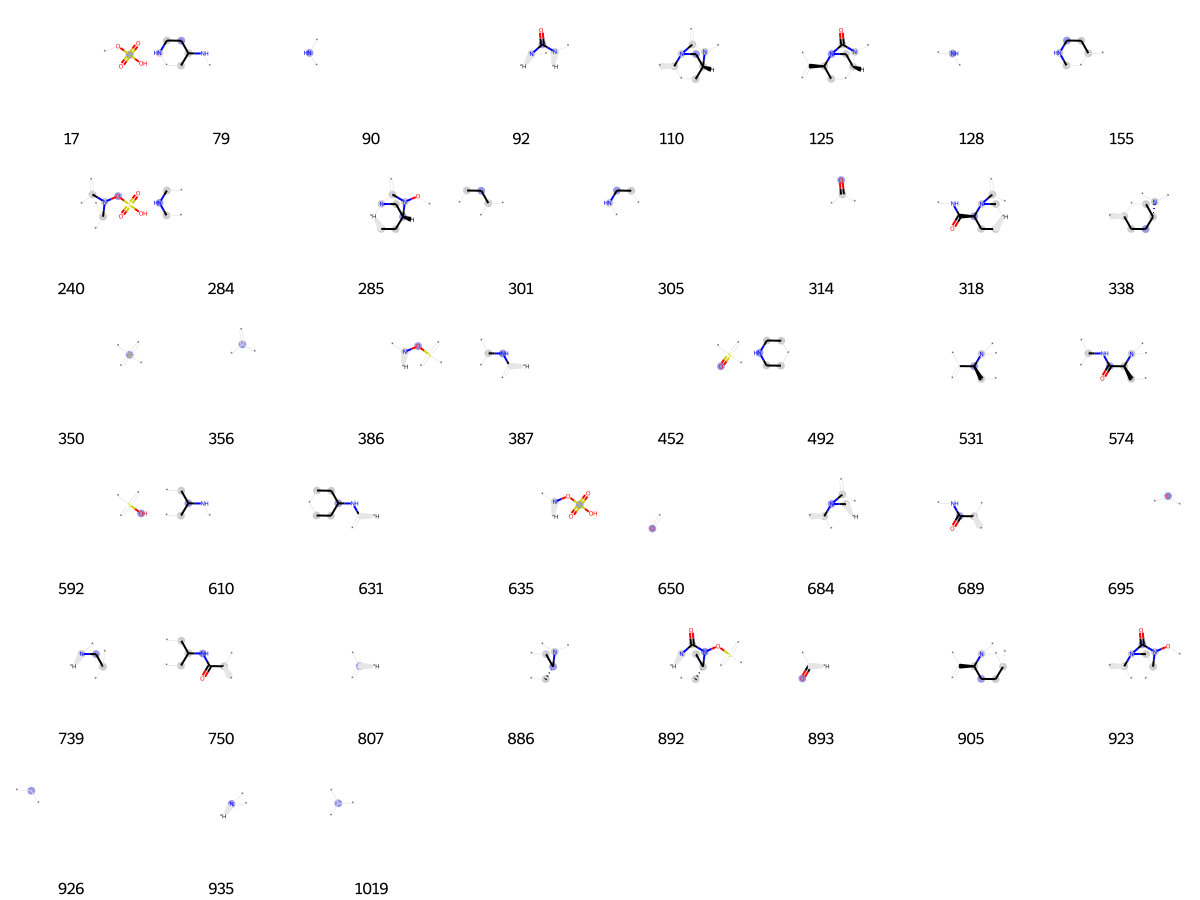

In [1315]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1316]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 64,
 74,
 80,
 199,
 202,
 232,
 252,
 263,
 314,
 333,
 356,
 361,
 370,
 385,
 389,
 425,
 441,
 443,
 455,
 472,
 479,
 502,
 512,
 540,
 541,
 575,
 578,
 609,
 623,
 650,
 656,
 690,
 694,
 695,
 698,
 707,
 713,
 714,
 723,
 807,
 841,
 893,
 926,
 1010,
 1017]

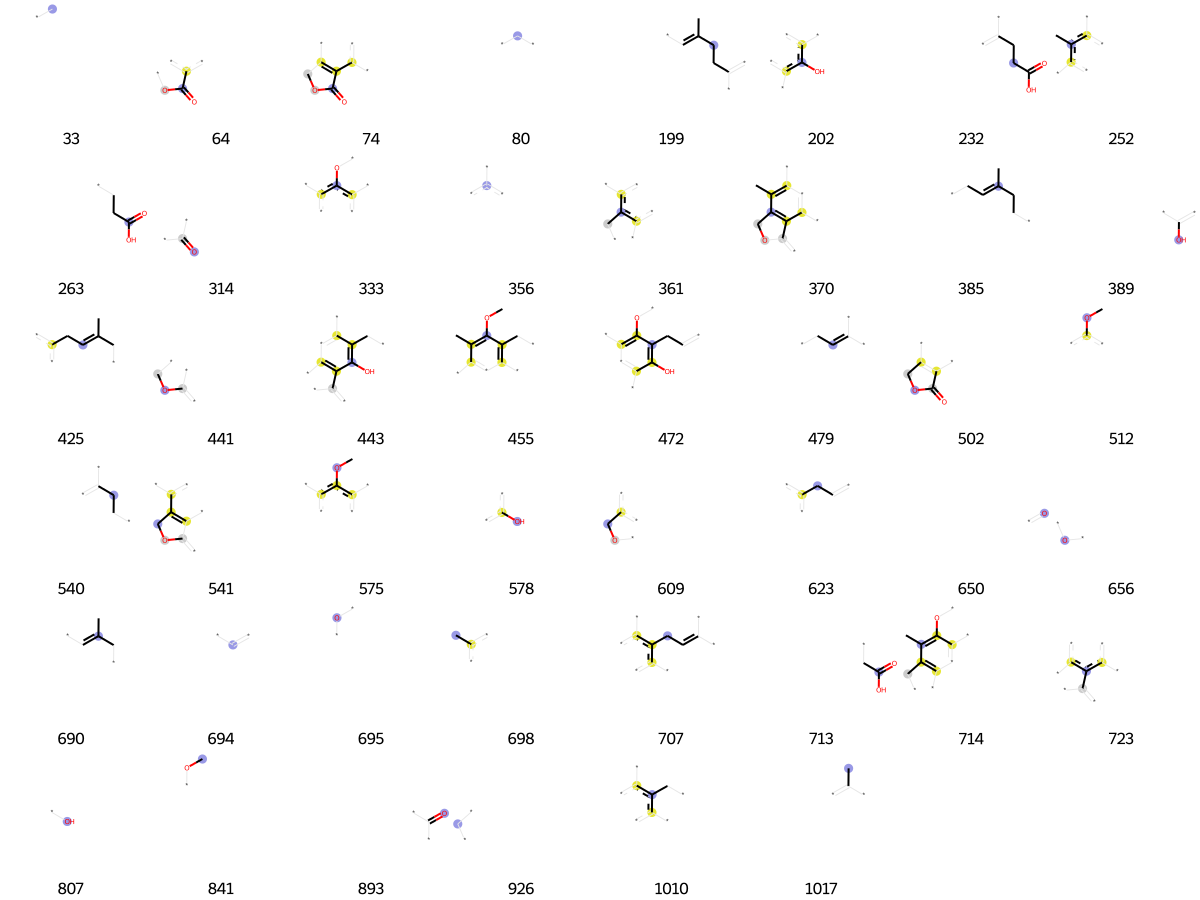

In [1317]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1318]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[2,
 4,
 33,
 101,
 128,
 165,
 185,
 200,
 212,
 216,
 235,
 271,
 289,
 319,
 352,
 356,
 361,
 366,
 378,
 456,
 486,
 490,
 516,
 540,
 561,
 650,
 659,
 680,
 698,
 714,
 726,
 772,
 777,
 799,
 807,
 816,
 820,
 828,
 849,
 850,
 871,
 875,
 891,
 892,
 893,
 926,
 932,
 935,
 947,
 956,
 974,
 999,
 1013,
 1016]

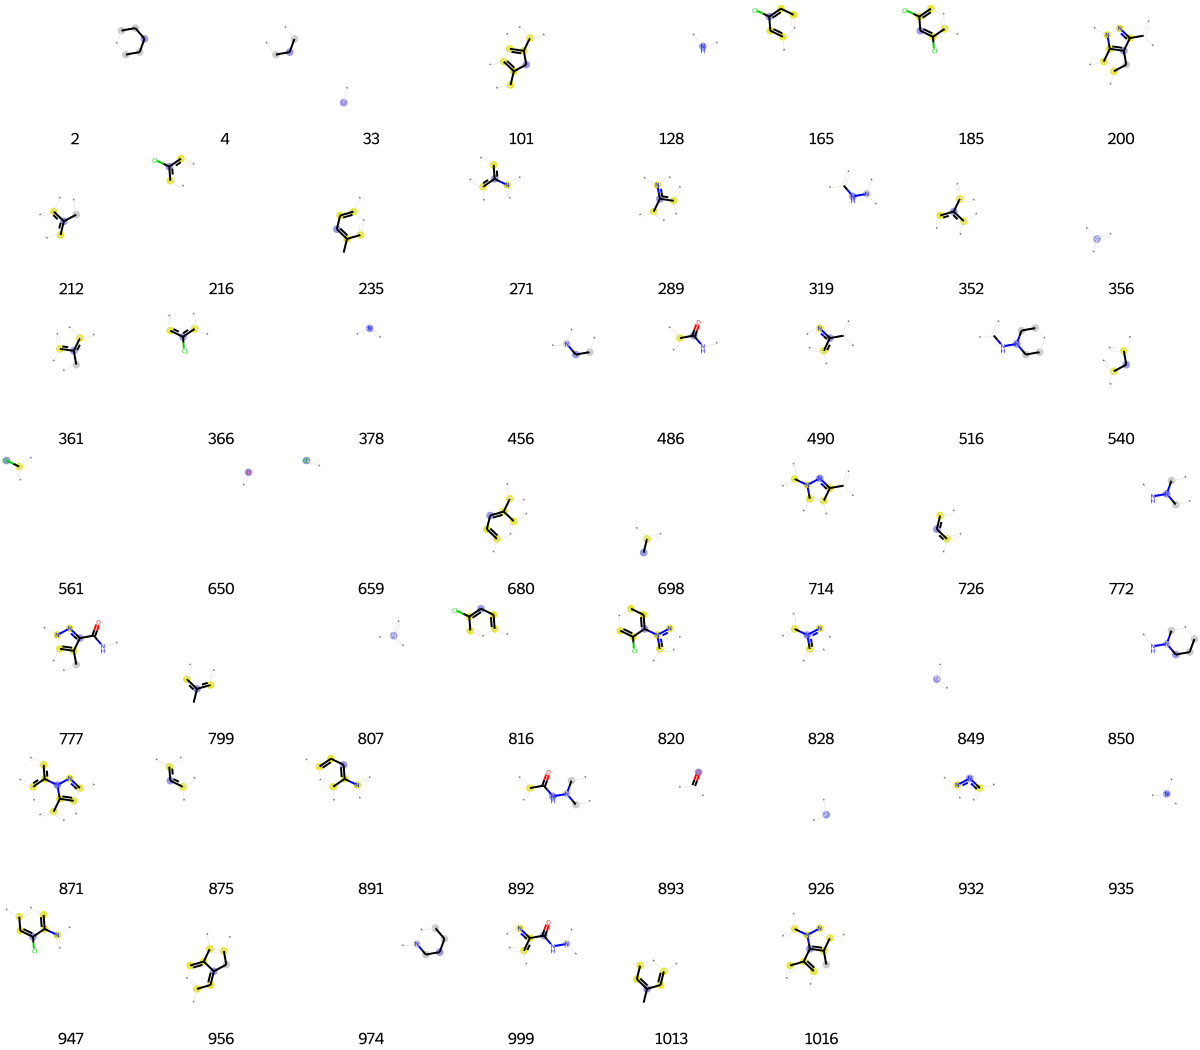

In [1319]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1320]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[5,
 18,
 33,
 36,
 41,
 56,
 61,
 64,
 80,
 102,
 125,
 126,
 128,
 130,
 175,
 181,
 192,
 202,
 233,
 250,
 255,
 314,
 322,
 332,
 345,
 356,
 387,
 389,
 428,
 562,
 611,
 650,
 673,
 675,
 695,
 715,
 726,
 753,
 807,
 809,
 849,
 851,
 863,
 893,
 913,
 919,
 935,
 980,
 1019]

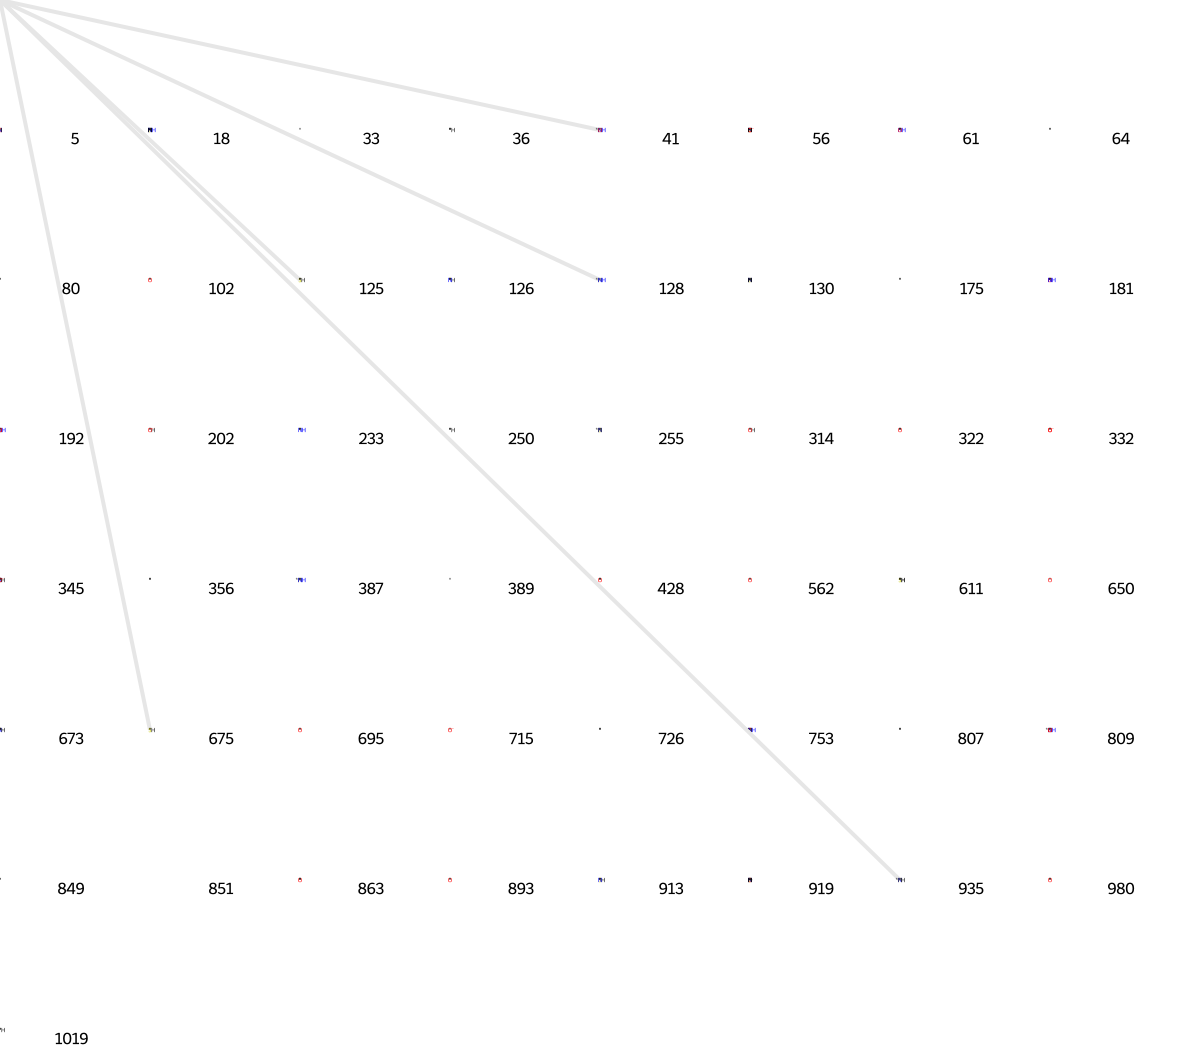

In [1321]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1322]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[3,
 14,
 16,
 19,
 33,
 43,
 64,
 68,
 74,
 77,
 80,
 114,
 121,
 123,
 128,
 166,
 184,
 191,
 207,
 212,
 262,
 325,
 356,
 361,
 367,
 378,
 389,
 412,
 419,
 428,
 429,
 430,
 456,
 486,
 511,
 526,
 546,
 597,
 613,
 615,
 617,
 650,
 667,
 673,
 674,
 682,
 698,
 717,
 726,
 741,
 755,
 767,
 768,
 771,
 784,
 792,
 807,
 809,
 819,
 838,
 842,
 843,
 849,
 875,
 893,
 904,
 923,
 926,
 933,
 935,
 954,
 1019]

In [1323]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[4,
 13,
 19,
 33,
 42,
 64,
 80,
 86,
 87,
 106,
 114,
 133,
 142,
 147,
 193,
 219,
 242,
 252,
 294,
 295,
 301,
 314,
 354,
 356,
 378,
 380,
 392,
 437,
 446,
 456,
 511,
 531,
 534,
 562,
 579,
 645,
 650,
 695,
 710,
 716,
 726,
 730,
 764,
 807,
 842,
 849,
 850,
 861,
 887,
 893,
 926,
 935,
 978,
 1019]

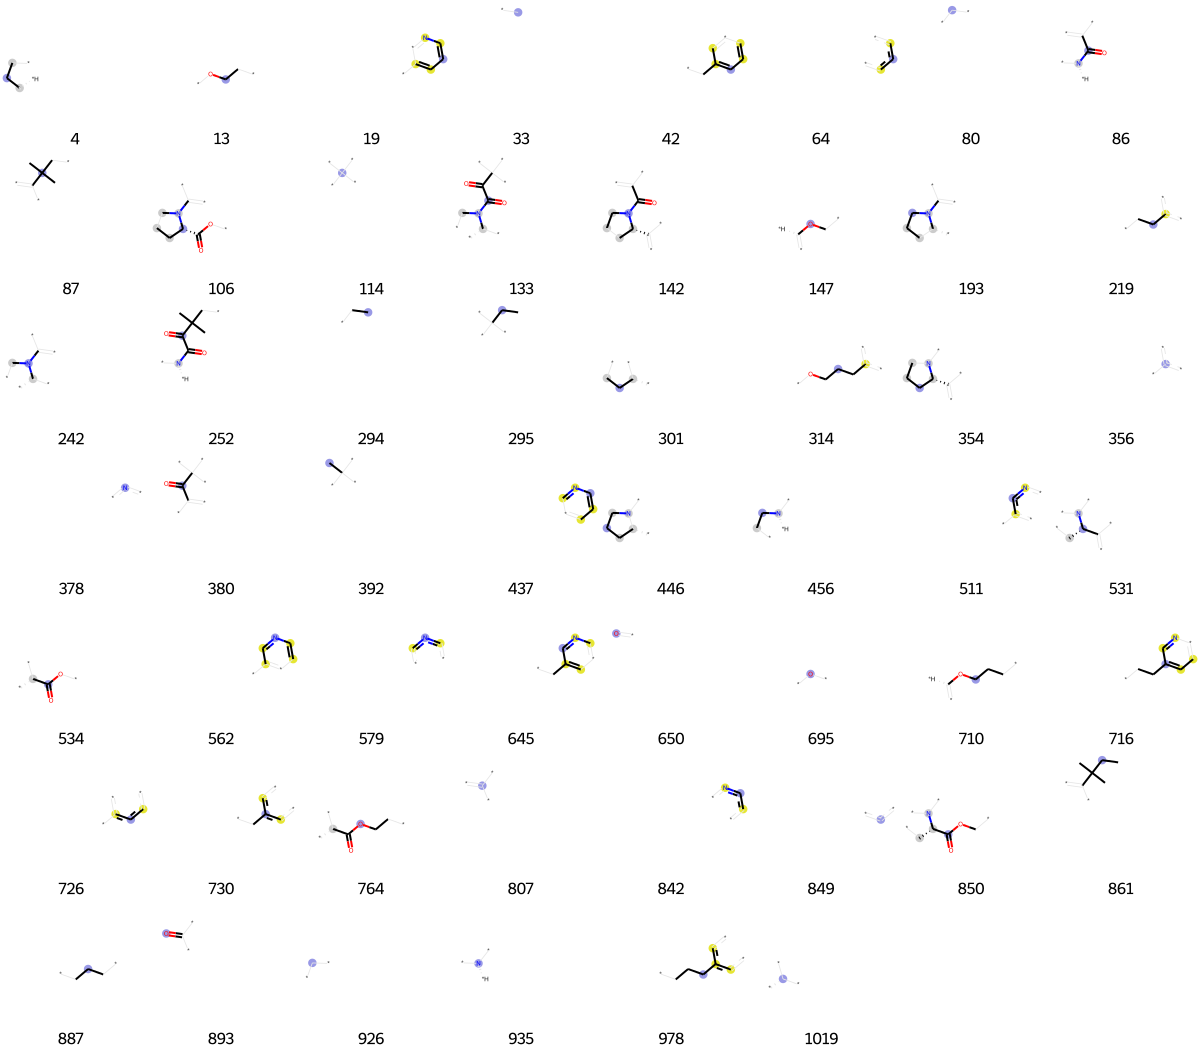

In [1324]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1325]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 5,
 18,
 27,
 33,
 36,
 56,
 64,
 87,
 92,
 117,
 125,
 126,
 128,
 130,
 175,
 181,
 189,
 202,
 218,
 233,
 250,
 255,
 284,
 314,
 332,
 341,
 345,
 350,
 356,
 363,
 387,
 389,
 452,
 456,
 514,
 557,
 573,
 585,
 590,
 611,
 618,
 650,
 673,
 675,
 692,
 715,
 718,
 726,
 731,
 753,
 807,
 818,
 836,
 849,
 862,
 893,
 913,
 919,
 926,
 935,
 966,
 1019]

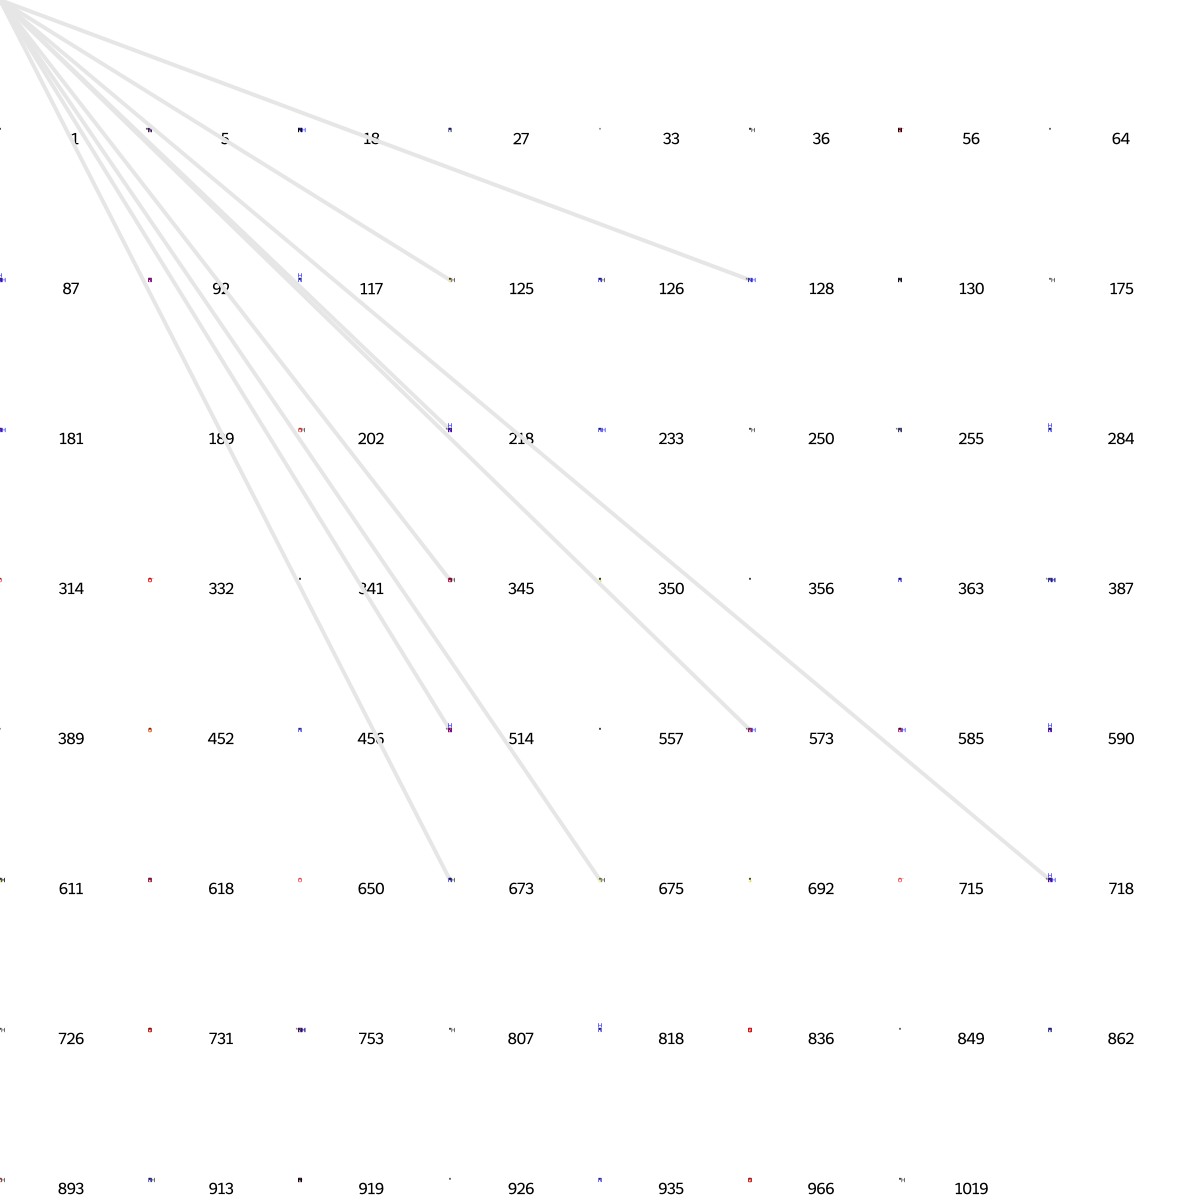

In [1326]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [1327]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[31,
 33,
 36,
 50,
 79,
 89,
 138,
 155,
 175,
 184,
 209,
 233,
 250,
 267,
 294,
 301,
 310,
 317,
 342,
 367,
 389,
 412,
 453,
 478,
 519,
 527,
 549,
 552,
 555,
 562,
 575,
 610,
 636,
 650,
 712,
 715,
 760,
 788,
 791,
 807,
 889,
 893,
 904,
 926,
 927,
 1009,
 1017,
 1019,
 1022]

In [1328]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[11,
 33,
 36,
 51,
 78,
 80,
 84,
 130,
 138,
 147,
 182,
 199,
 233,
 240,
 250,
 283,
 301,
 314,
 315,
 356,
 373,
 404,
 408,
 412,
 465,
 493,
 504,
 507,
 519,
 520,
 529,
 547,
 580,
 622,
 639,
 650,
 679,
 695,
 714,
 738,
 787,
 807,
 846,
 849,
 893,
 914,
 926,
 967,
 973,
 980,
 997,
 1009,
 1017,
 1019]

In [1329]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[5,
 11,
 22,
 25,
 33,
 36,
 41,
 80,
 92,
 95,
 102,
 124,
 138,
 147,
 163,
 200,
 214,
 228,
 233,
 250,
 324,
 356,
 393,
 459,
 463,
 497,
 521,
 550,
 650,
 656,
 657,
 695,
 698,
 714,
 787,
 807,
 809,
 846,
 849,
 893,
 897,
 918,
 926,
 928,
 936,
 955,
 967,
 998,
 1017,
 1019]

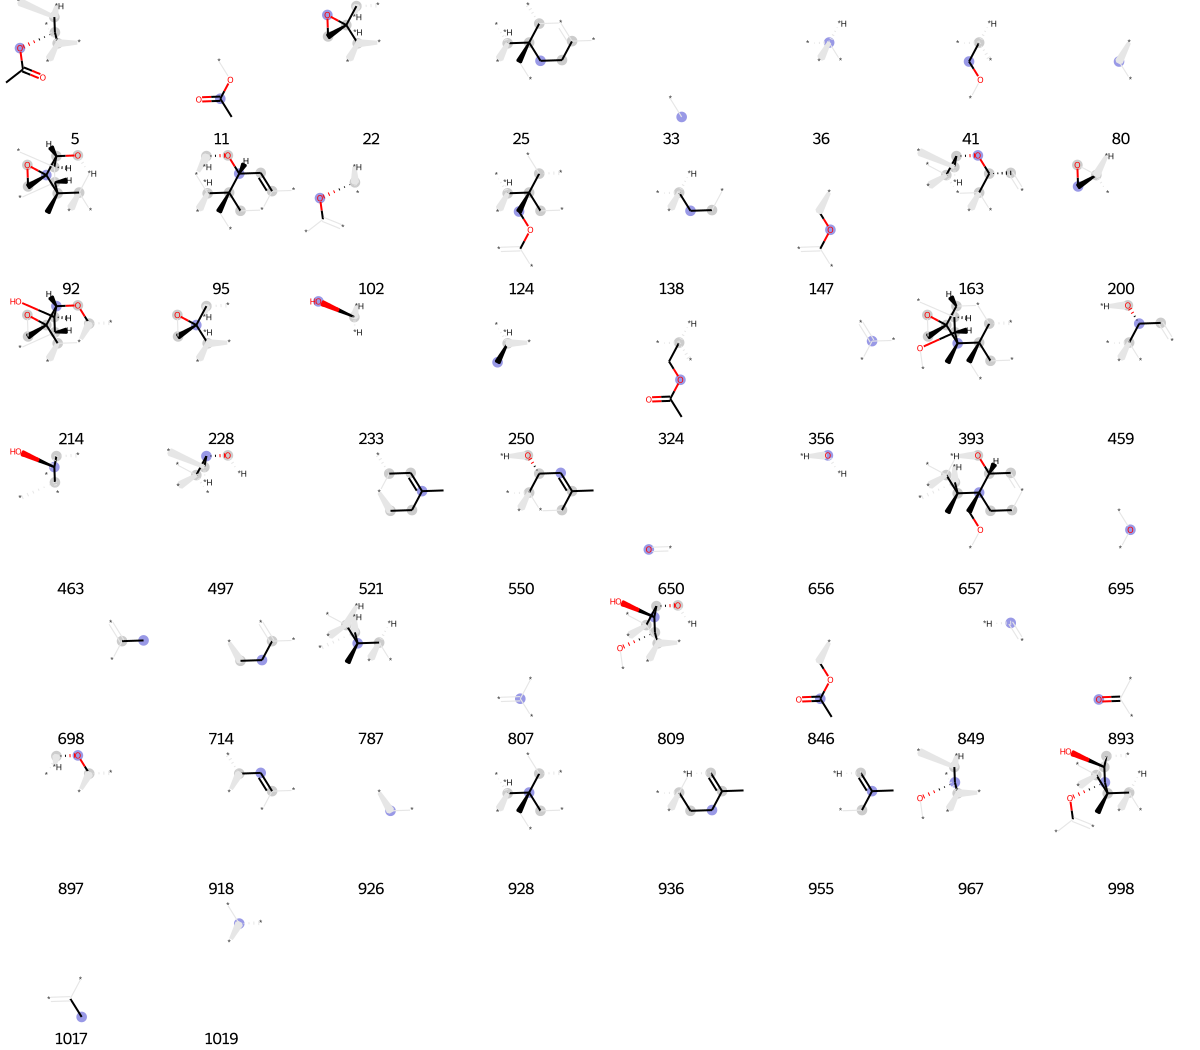

In [1330]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1331]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[3,
 4,
 29,
 32,
 33,
 42,
 65,
 100,
 128,
 130,
 147,
 163,
 165,
 171,
 193,
 200,
 205,
 216,
 231,
 242,
 246,
 288,
 301,
 335,
 350,
 352,
 356,
 367,
 378,
 407,
 409,
 452,
 456,
 464,
 480,
 488,
 557,
 561,
 570,
 613,
 650,
 659,
 667,
 692,
 698,
 726,
 739,
 807,
 808,
 816,
 819,
 831,
 832,
 834,
 838,
 849,
 860,
 863,
 875,
 890,
 893,
 901,
 926,
 932,
 933,
 934,
 935,
 967,
 974,
 980,
 1019]

In [1332]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 10,
 13,
 33,
 45,
 46,
 60,
 64,
 74,
 78,
 79,
 80,
 116,
 117,
 121,
 128,
 145,
 147,
 152,
 156,
 175,
 207,
 216,
 239,
 258,
 294,
 322,
 325,
 333,
 355,
 356,
 359,
 361,
 362,
 389,
 411,
 456,
 458,
 460,
 480,
 486,
 487,
 512,
 533,
 540,
 561,
 609,
 641,
 650,
 653,
 659,
 673,
 677,
 688,
 695,
 698,
 710,
 718,
 726,
 736,
 737,
 739,
 742,
 767,
 781,
 794,
 807,
 813,
 816,
 841,
 849,
 858,
 875,
 881,
 887,
 893,
 926,
 927,
 935,
 948,
 961,
 978,
 997,
 1010]

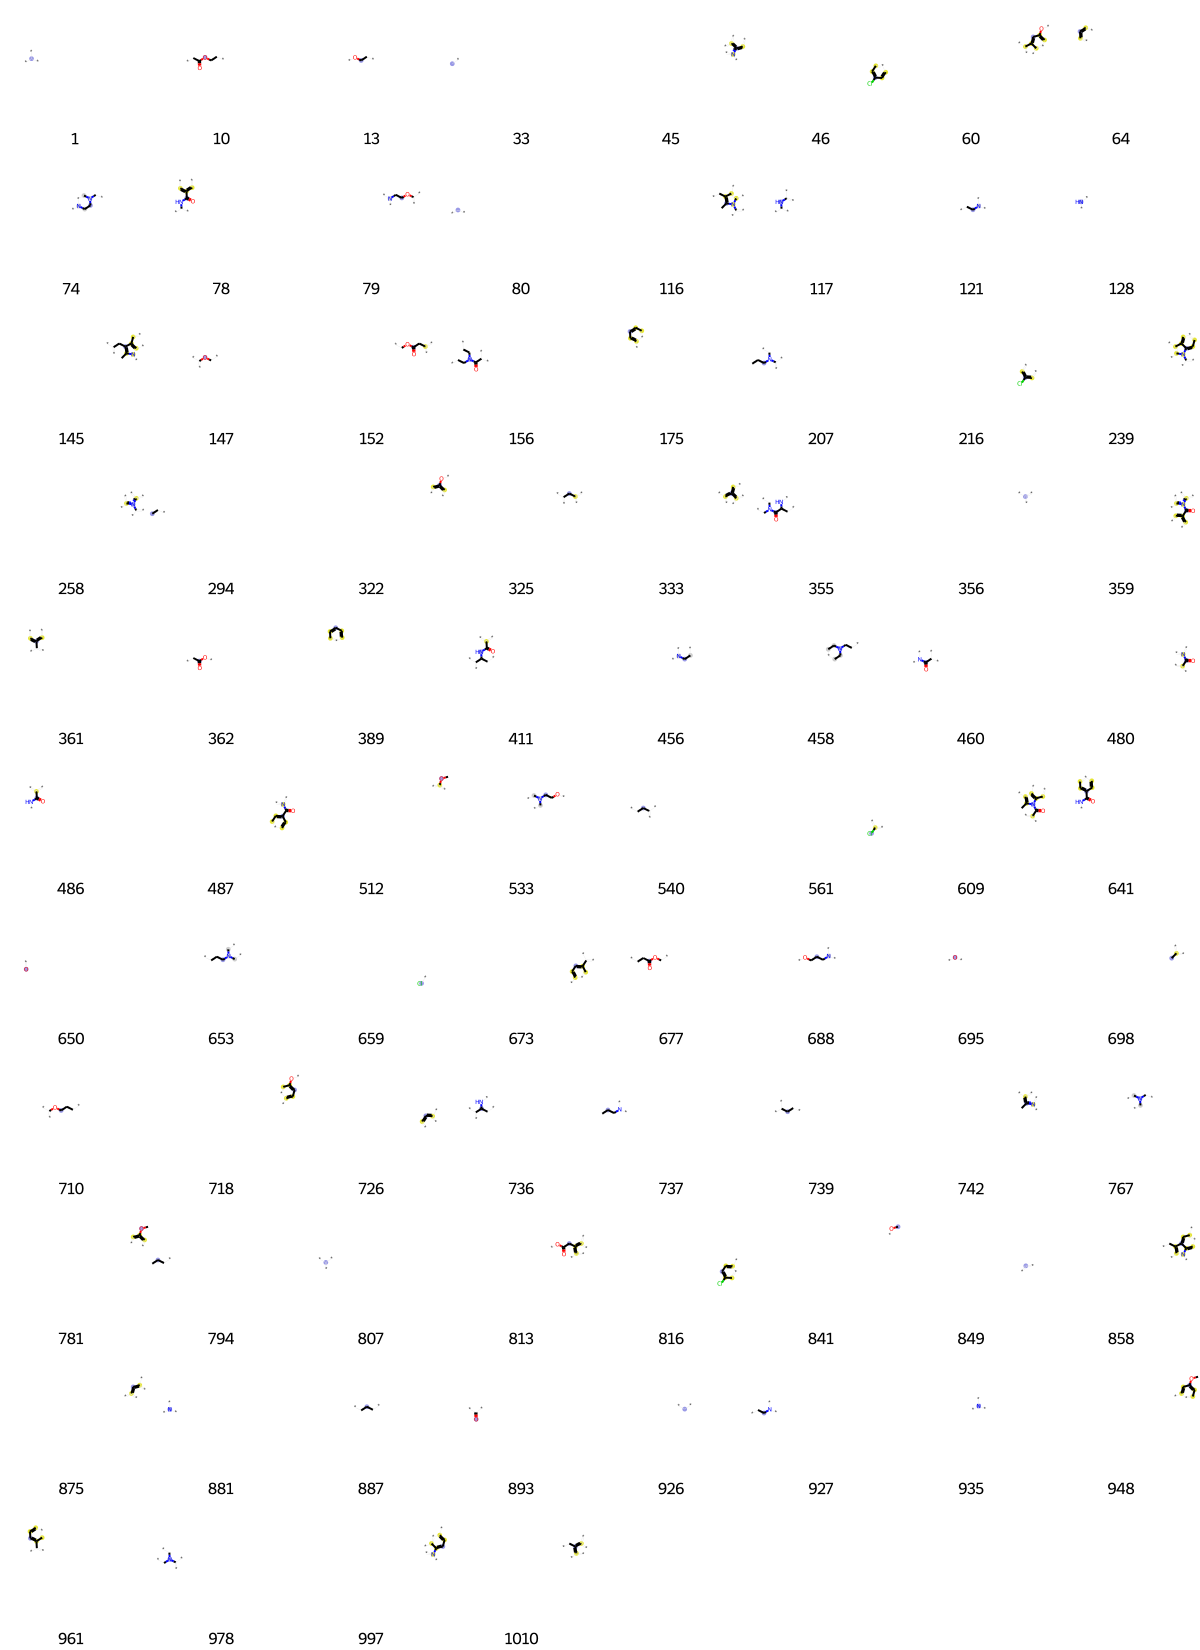

In [1333]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [1334]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[32,
 33,
 36,
 59,
 65,
 84,
 88,
 132,
 138,
 177,
 242,
 245,
 250,
 258,
 274,
 301,
 314,
 356,
 412,
 420,
 479,
 519,
 529,
 547,
 555,
 574,
 604,
 650,
 656,
 666,
 714,
 735,
 821,
 841,
 849,
 860,
 917,
 926,
 970,
 985,
 1006,
 1015,
 1019]

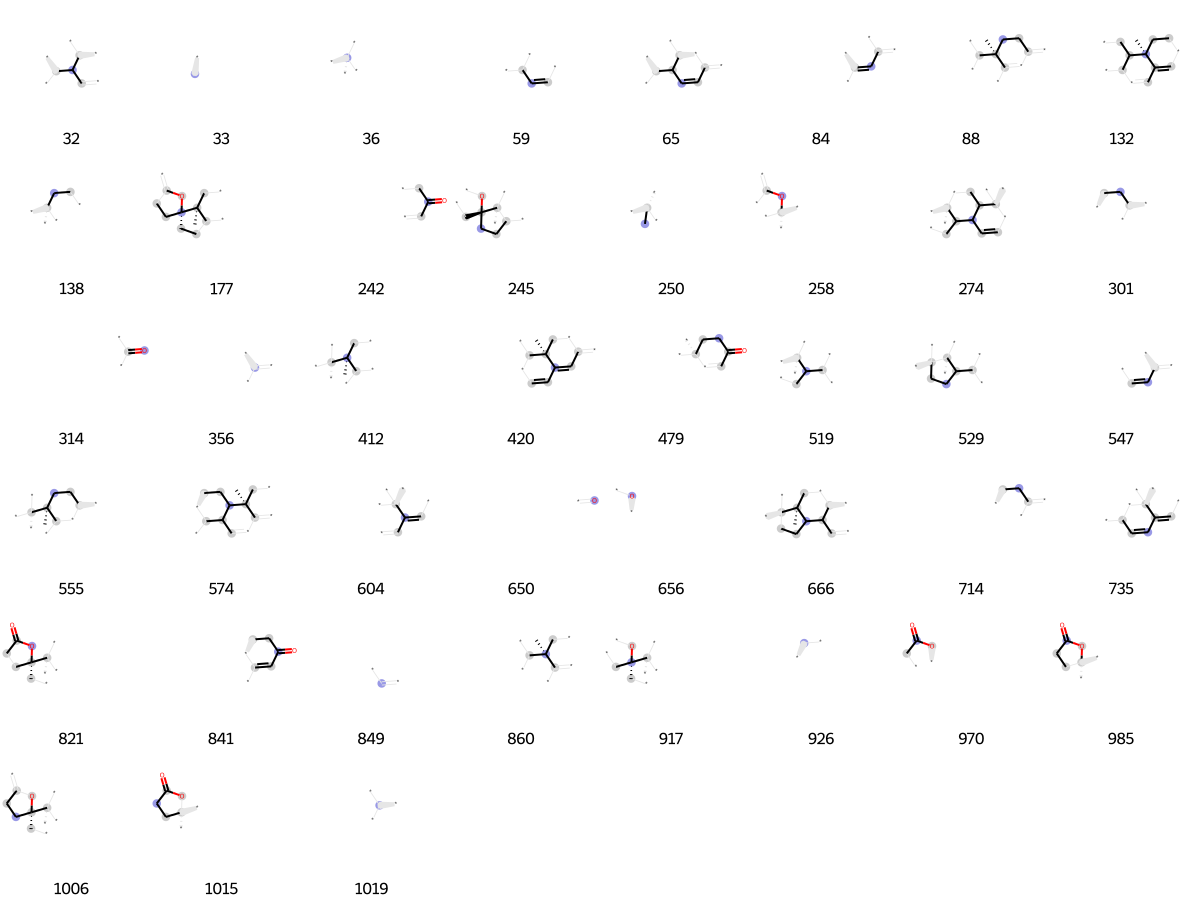

In [1335]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1336]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[8,
 33,
 36,
 64,
 80,
 90,
 121,
 128,
 138,
 143,
 145,
 147,
 171,
 175,
 197,
 250,
 255,
 256,
 265,
 266,
 350,
 356,
 389,
 440,
 456,
 458,
 473,
 484,
 486,
 537,
 556,
 627,
 650,
 653,
 667,
 676,
 695,
 698,
 715,
 726,
 753,
 767,
 769,
 772,
 779,
 785,
 790,
 807,
 838,
 841,
 849,
 852,
 878,
 887,
 893,
 906,
 926,
 935,
 939,
 1005,
 1010,
 1019]

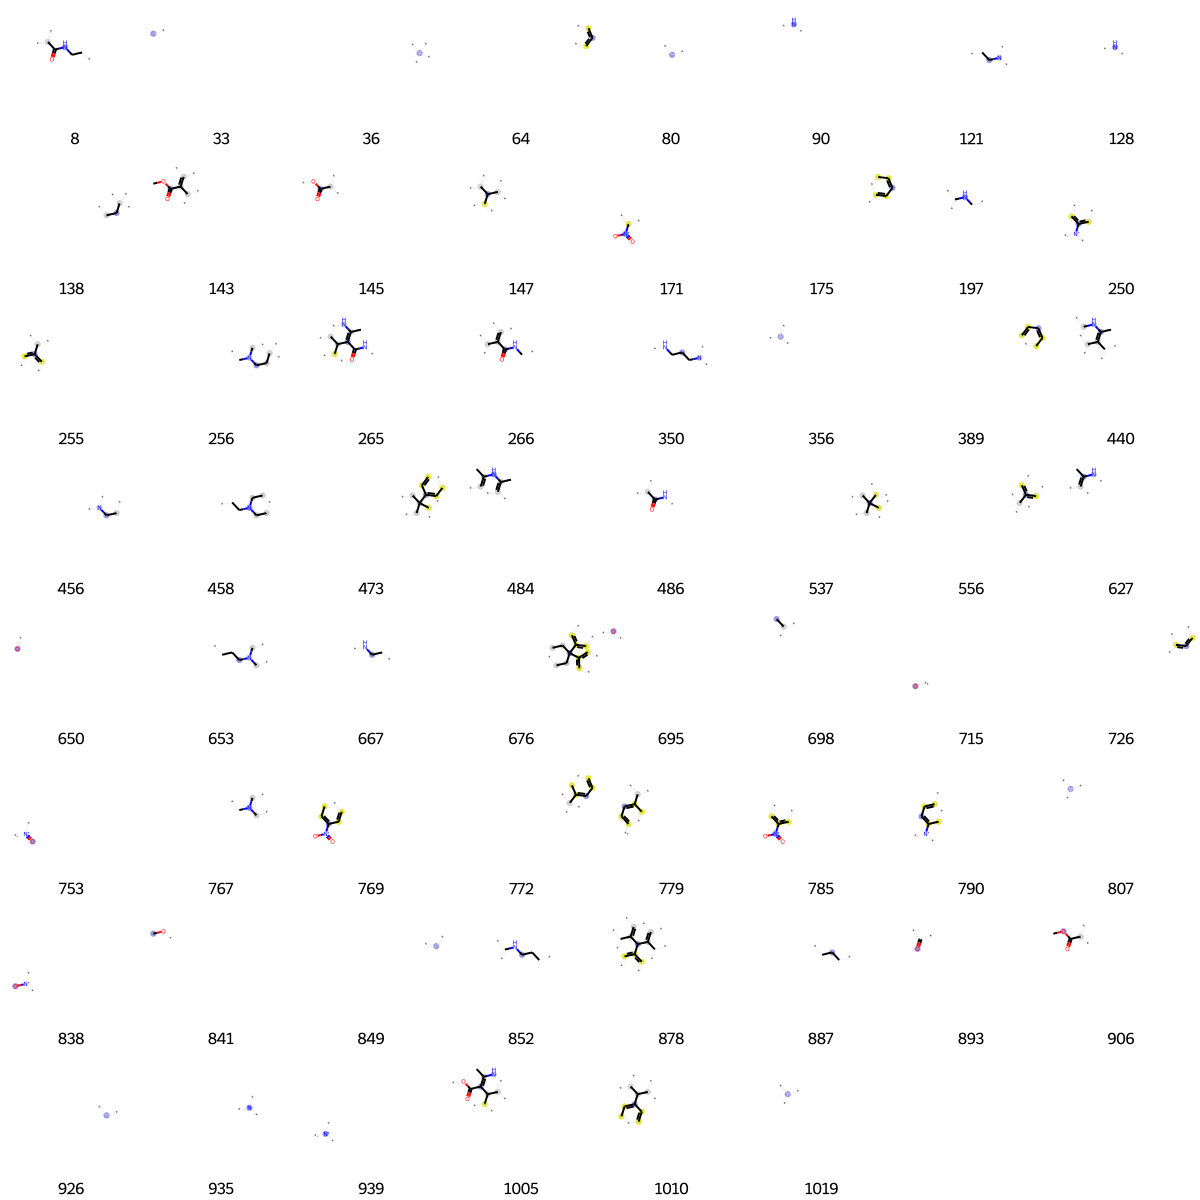

In [1337]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [1338]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[10,
 24,
 33,
 36,
 45,
 73,
 80,
 90,
 93,
 102,
 121,
 147,
 228,
 252,
 275,
 284,
 310,
 314,
 318,
 322,
 346,
 356,
 357,
 359,
 360,
 367,
 378,
 384,
 419,
 424,
 428,
 432,
 433,
 458,
 460,
 515,
 564,
 591,
 593,
 620,
 650,
 654,
 675,
 695,
 698,
 718,
 726,
 730,
 745,
 751,
 807,
 816,
 831,
 832,
 849,
 875,
 935,
 961,
 987,
 1013,
 1019]

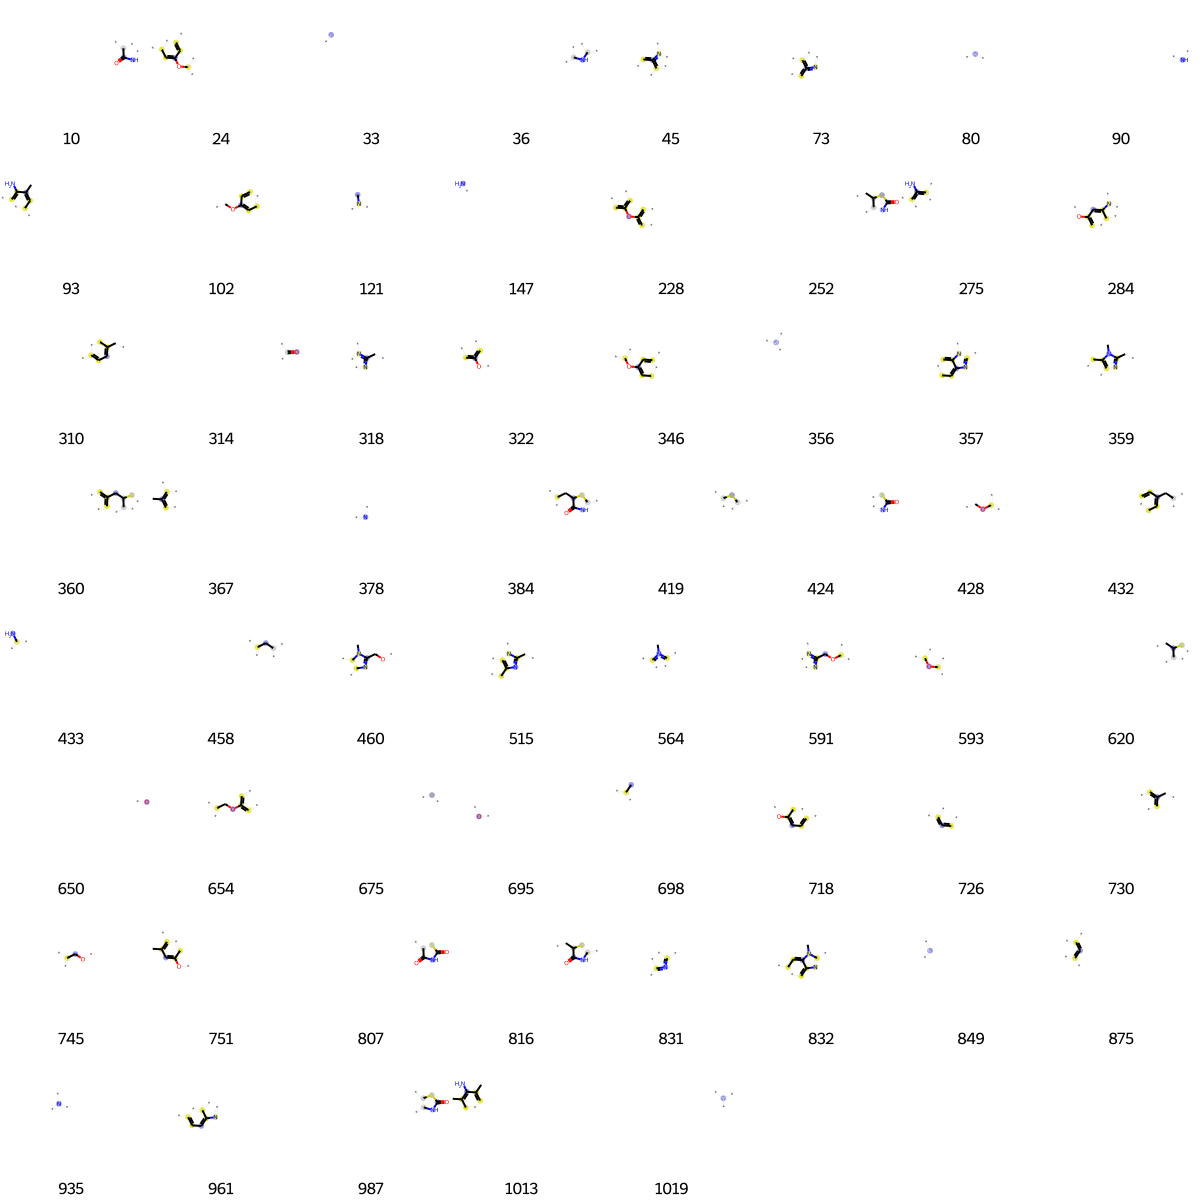

In [1339]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1340]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 33,
 80,
 118,
 119,
 147,
 222,
 227,
 243,
 294,
 362,
 375,
 420,
 482,
 523,
 526,
 540,
 591,
 650,
 677,
 695,
 729,
 794,
 807,
 887,
 893,
 953,
 1014]

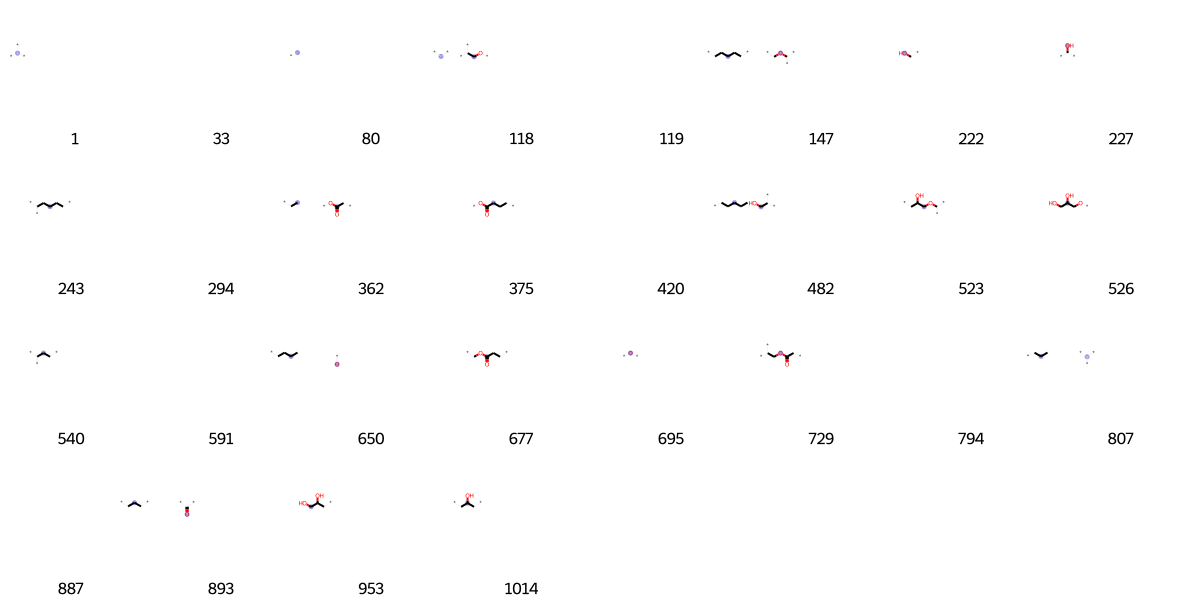

In [1341]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [1342]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[15,
 33,
 64,
 72,
 128,
 139,
 184,
 191,
 200,
 278,
 288,
 289,
 355,
 356,
 361,
 367,
 486,
 526,
 541,
 578,
 609,
 628,
 641,
 650,
 658,
 667,
 673,
 676,
 698,
 726,
 745,
 754,
 771,
 792,
 807,
 843,
 849,
 875,
 881,
 893,
 947,
 954,
 961]

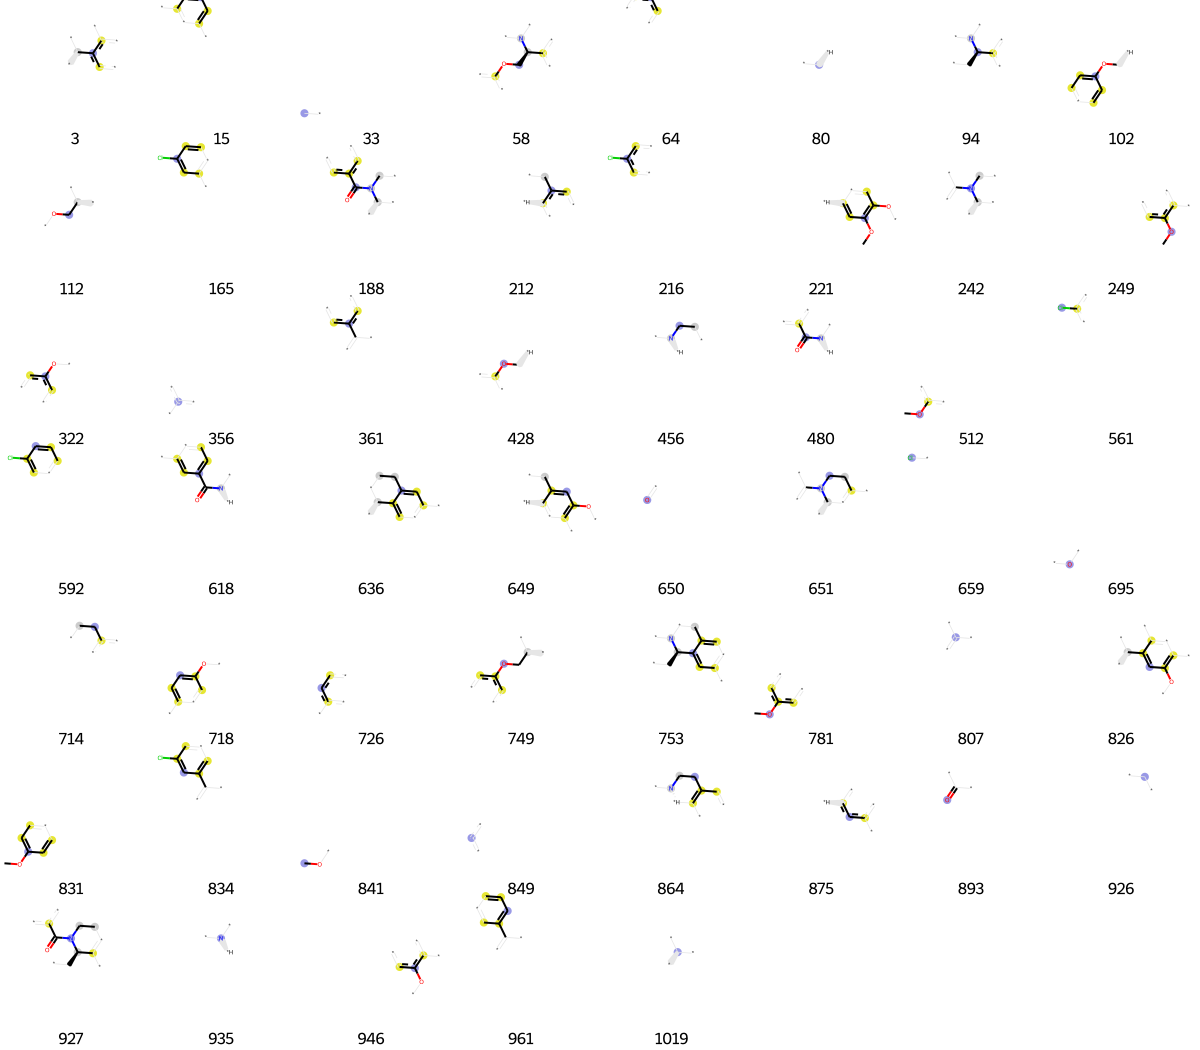

In [1343]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [1344]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 2,
 4,
 29,
 33,
 80,
 128,
 283,
 301,
 406,
 484,
 691,
 694,
 883,
 890,
 921,
 926,
 954,
 994,
 1007,
 1019]

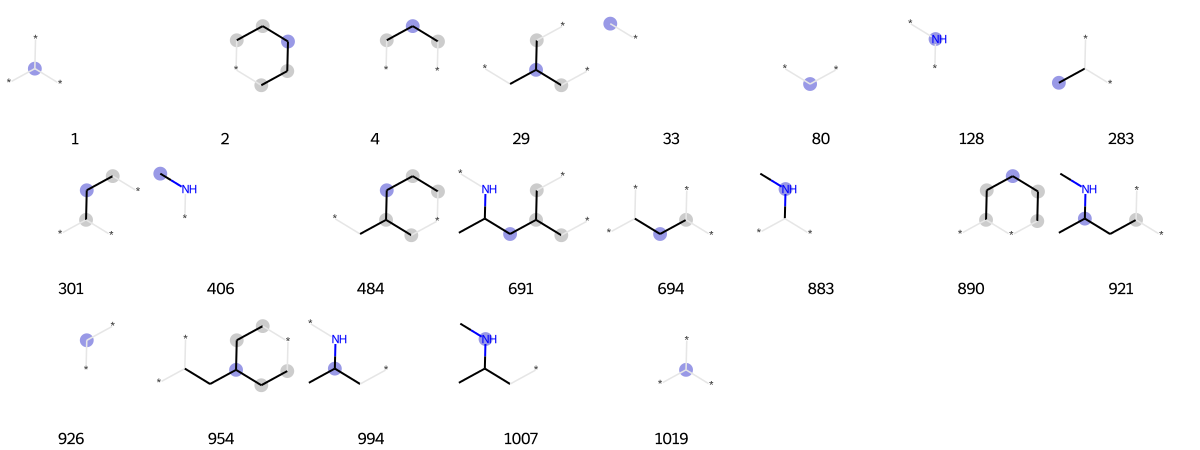

In [1345]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [1346]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[5,
 33,
 64,
 80,
 90,
 96,
 97,
 115,
 119,
 121,
 153,
 160,
 175,
 301,
 314,
 325,
 328,
 330,
 333,
 356,
 364,
 398,
 458,
 474,
 549,
 583,
 650,
 693,
 726,
 759,
 806,
 811,
 849,
 855,
 912,
 913,
 935,
 987,
 1019]

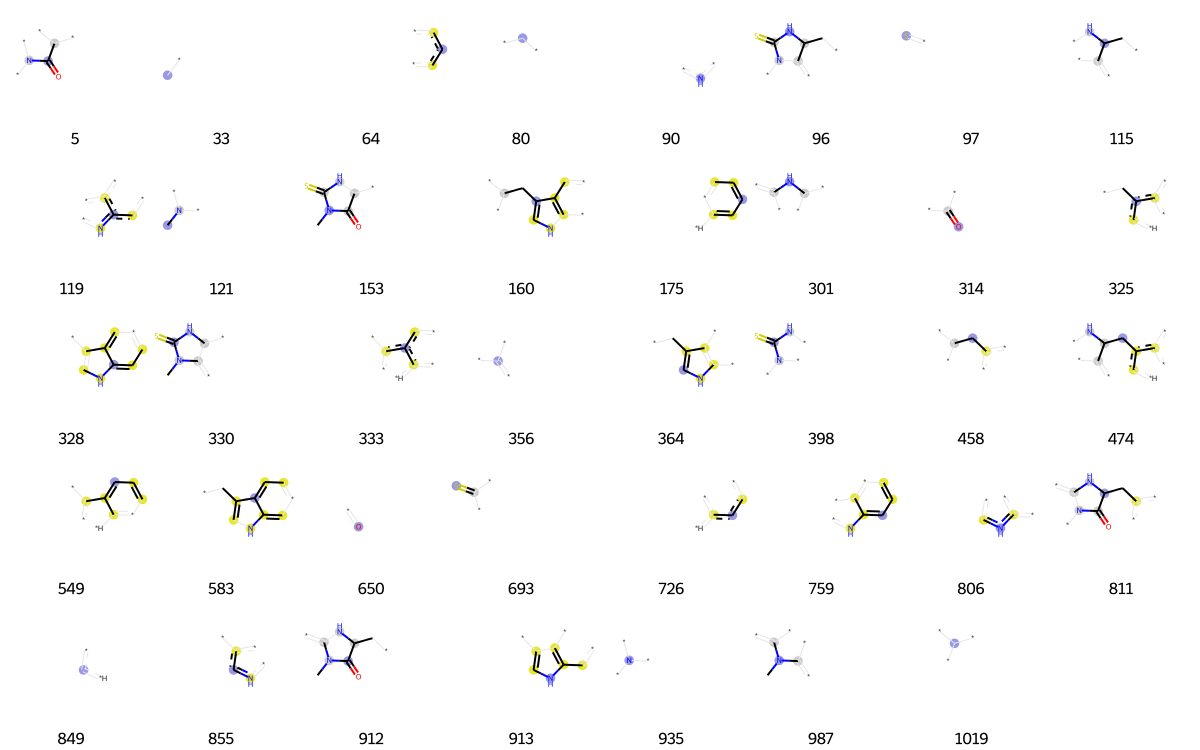

In [1347]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [1348]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 5,
 18,
 33,
 36,
 64,
 69,
 80,
 125,
 126,
 128,
 130,
 147,
 175,
 181,
 214,
 233,
 239,
 245,
 250,
 251,
 255,
 274,
 283,
 294,
 313,
 314,
 341,
 356,
 387,
 389,
 514,
 534,
 557,
 569,
 573,
 582,
 585,
 607,
 611,
 650,
 673,
 675,
 695,
 698,
 709,
 726,
 753,
 773,
 786,
 807,
 849,
 860,
 893,
 913,
 919,
 935,
 1000,
 1019]

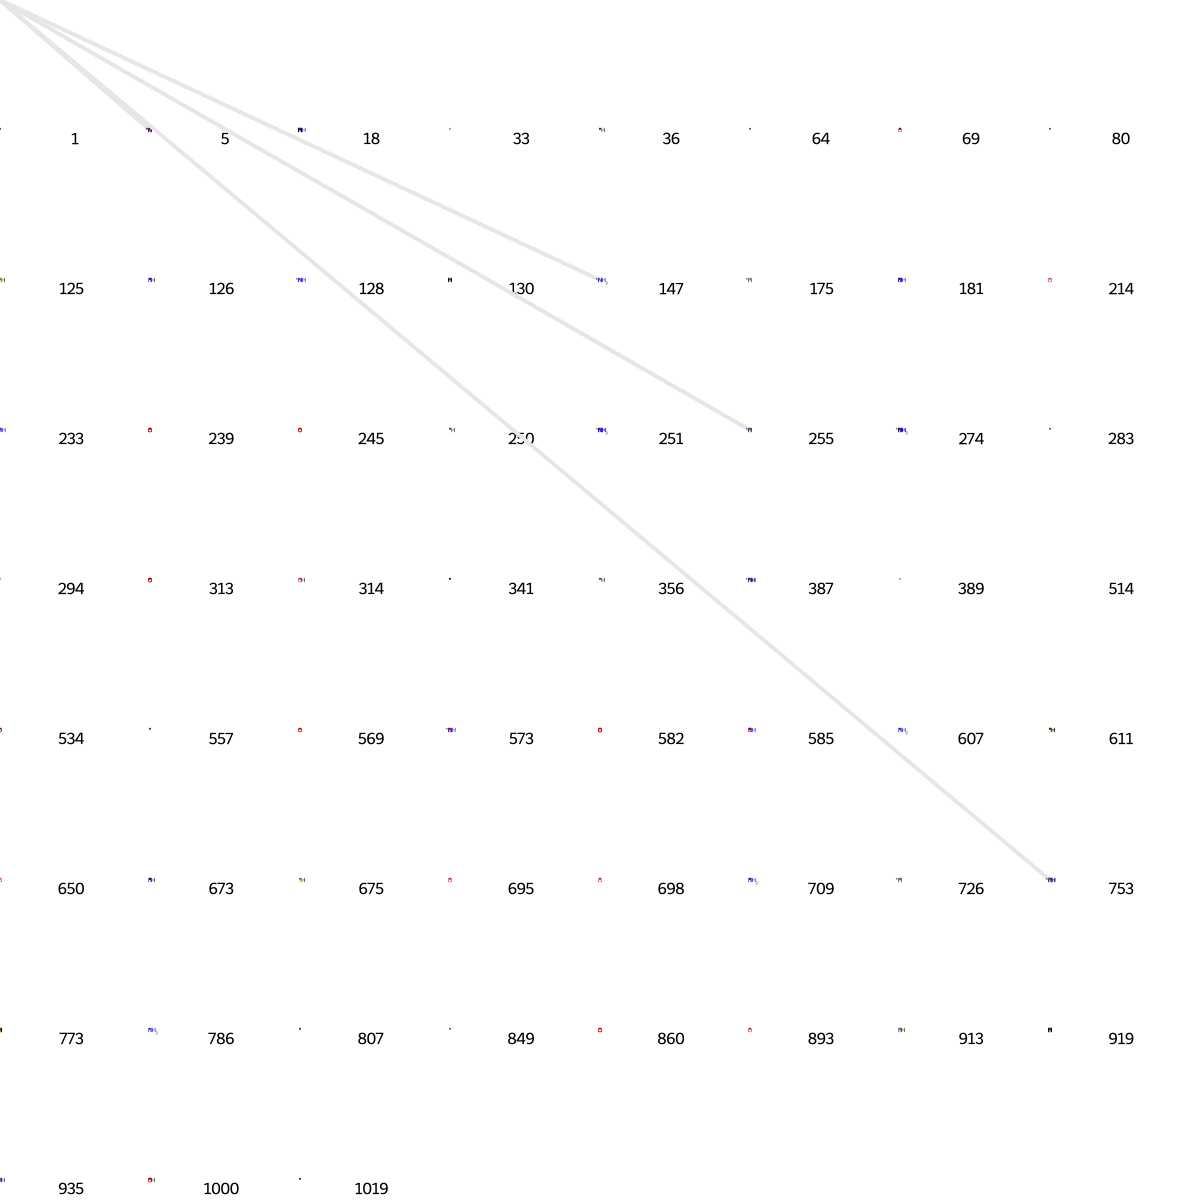

In [1349]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [1350]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 33,
 80,
 85,
 160,
 171,
 172,
 207,
 227,
 281,
 356,
 378,
 428,
 468,
 501,
 506,
 511,
 650,
 659,
 698,
 715,
 753,
 796,
 802,
 807,
 838,
 849,
 891,
 898,
 917,
 935,
 936,
 939,
 949,
 1014]

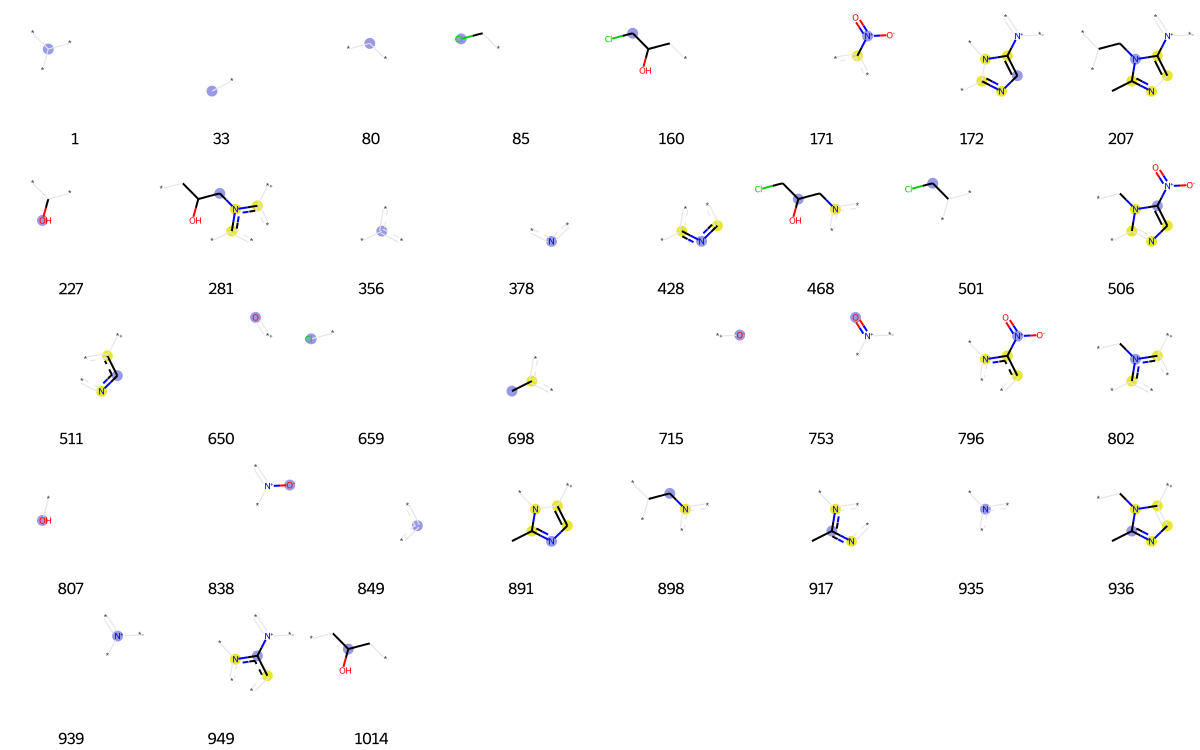

In [1351]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [1352]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[33,
 80,
 101,
 114,
 233,
 284,
 342,
 392,
 401,
 461,
 479,
 550,
 558,
 621,
 694,
 698,
 807,
 884,
 906,
 973,
 975,
 1017]

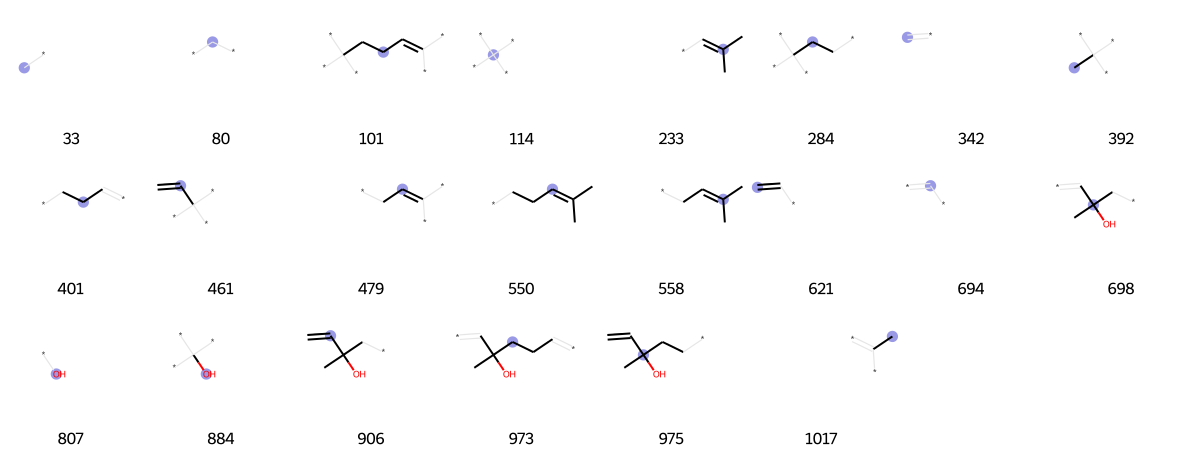

In [1353]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [1354]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[1,
 33,
 64,
 80,
 90,
 128,
 175,
 214,
 237,
 265,
 284,
 294,
 305,
 341,
 350,
 356,
 382,
 386,
 389,
 407,
 411,
 425,
 428,
 452,
 470,
 499,
 557,
 592,
 649,
 650,
 656,
 664,
 671,
 692,
 695,
 726,
 787,
 802,
 807,
 812,
 849,
 894,
 921,
 926,
 942,
 946,
 949,
 950,
 1019]

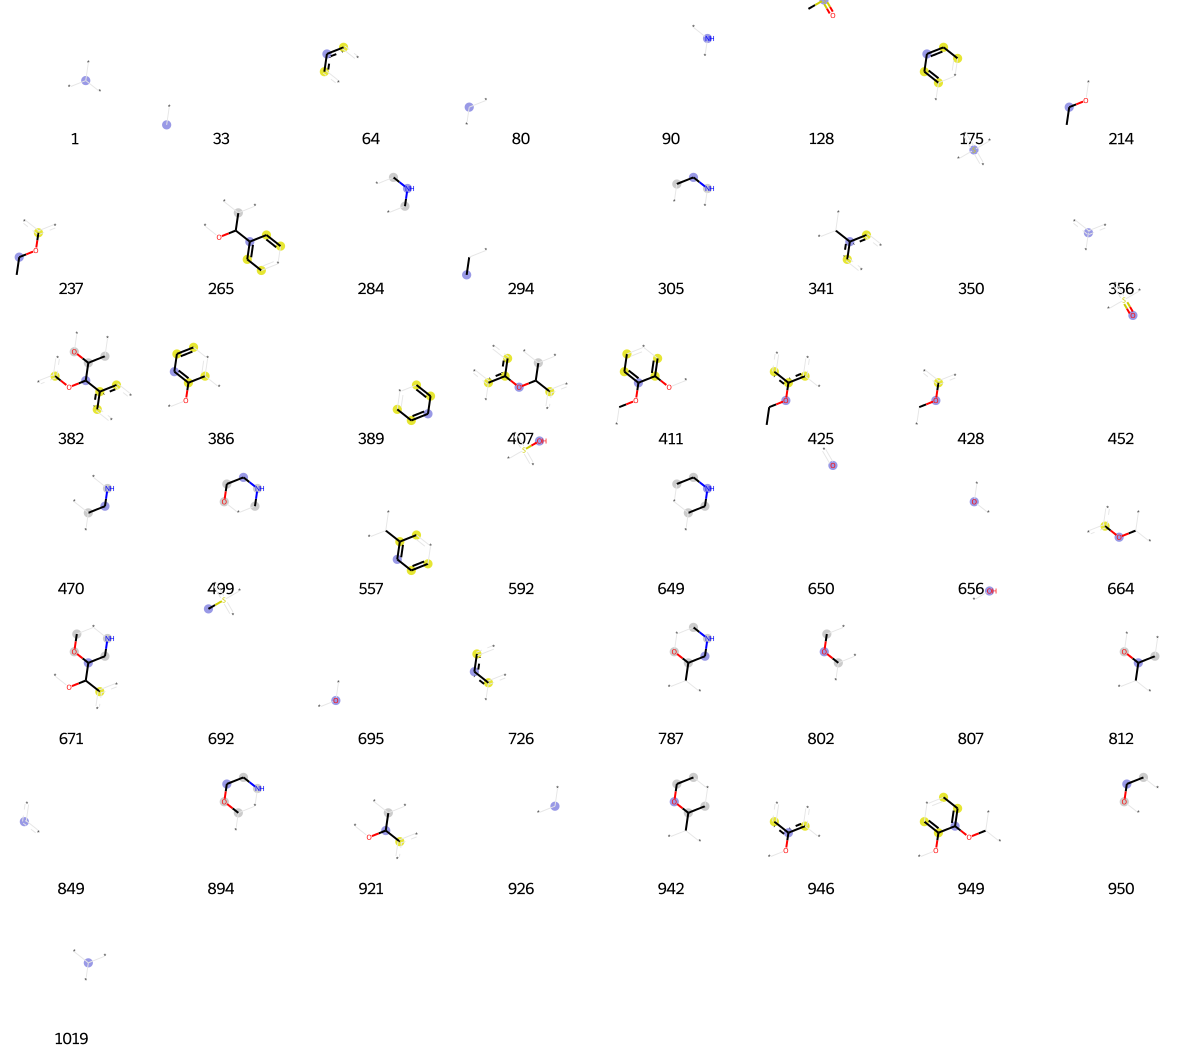

In [1355]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [1356]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[32,
 33,
 36,
 80,
 84,
 130,
 138,
 147,
 189,
 199,
 202,
 233,
 240,
 250,
 264,
 268,
 283,
 285,
 301,
 314,
 315,
 356,
 362,
 399,
 412,
 426,
 452,
 465,
 507,
 519,
 520,
 529,
 540,
 547,
 580,
 622,
 639,
 650,
 655,
 664,
 677,
 679,
 695,
 715,
 735,
 738,
 770,
 781,
 785,
 787,
 798,
 807,
 849,
 893,
 914,
 926,
 962,
 967,
 973,
 980,
 997,
 1009,
 1019]

In [1357]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[4,
 64,
 80,
 97,
 121,
 134,
 170,
 175,
 181,
 226,
 301,
 356,
 361,
 389,
 390,
 398,
 401,
 407,
 446,
 456,
 479,
 504,
 514,
 650,
 694,
 726,
 738,
 739,
 767,
 807,
 849,
 869,
 893,
 914,
 926,
 935,
 961,
 974,
 1019,
 1021]

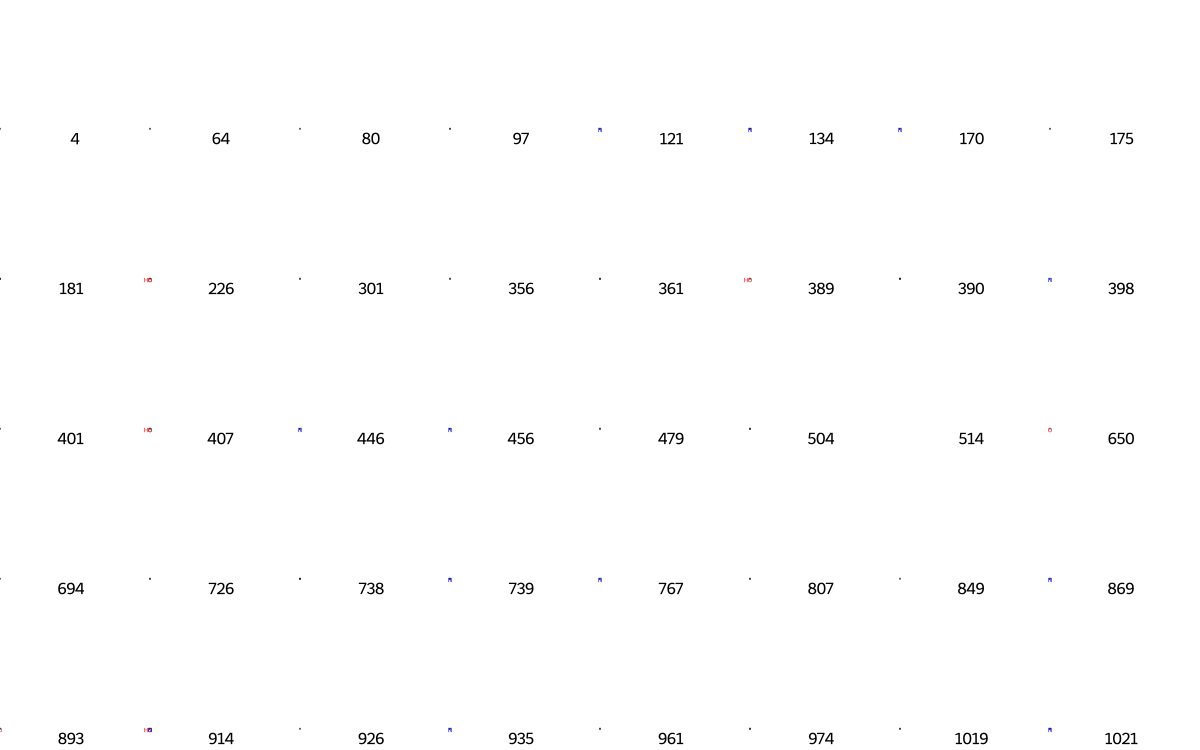

In [1358]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [1359]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[21,
 33,
 36,
 46,
 64,
 74,
 80,
 91,
 139,
 175,
 212,
 216,
 258,
 314,
 352,
 356,
 373,
 466,
 484,
 556,
 561,
 650,
 652,
 656,
 659,
 684,
 693,
 726,
 728,
 756,
 792,
 795,
 816,
 822,
 840,
 849,
 881,
 926,
 927,
 940,
 984]

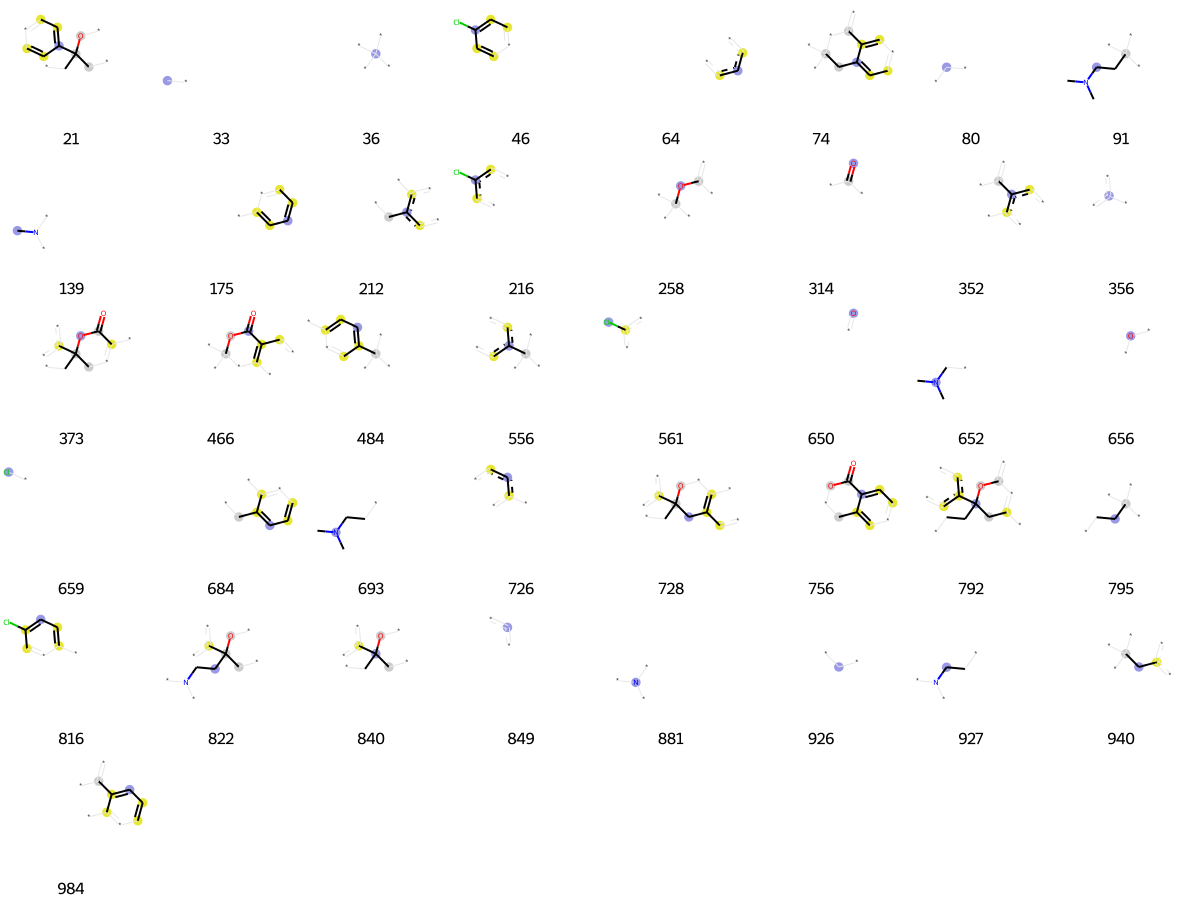

In [1360]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [1361]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[29,
 42,
 64,
 65,
 80,
 147,
 165,
 175,
 231,
 311,
 314,
 340,
 356,
 374,
 389,
 650,
 659,
 726,
 730,
 739,
 741,
 749,
 775,
 798,
 849,
 895,
 926,
 935,
 966,
 981,
 1019]

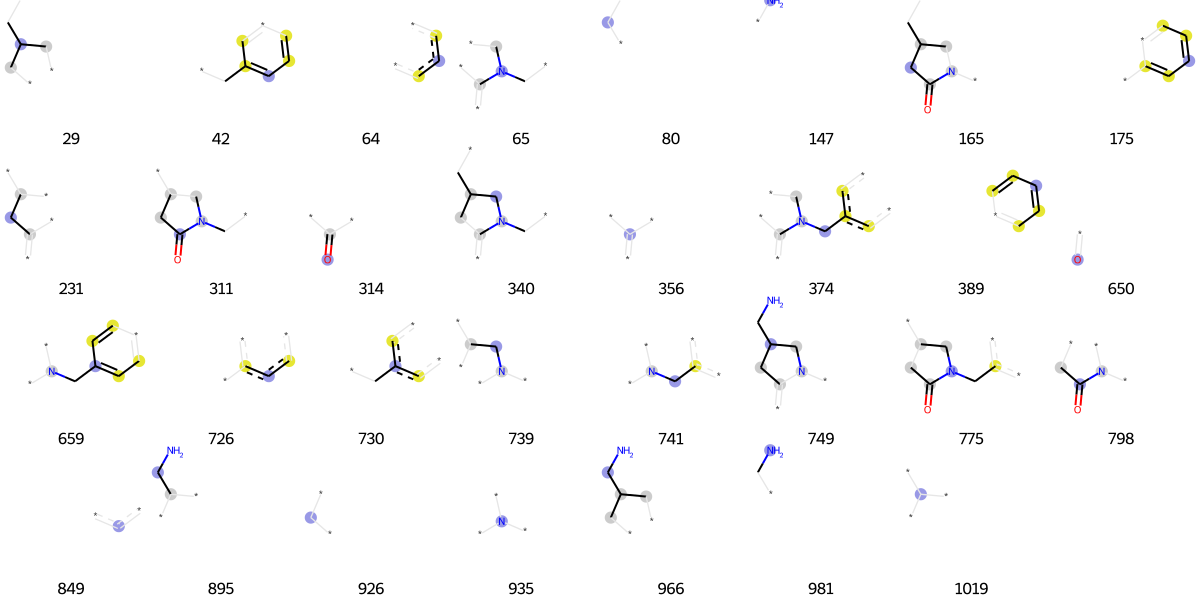

In [1362]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [1363]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 64,
 67,
 73,
 80,
 107,
 129,
 162,
 175,
 224,
 262,
 289,
 310,
 341,
 345,
 351,
 356,
 360,
 378,
 381,
 391,
 417,
 428,
 456,
 461,
 501,
 523,
 545,
 557,
 602,
 656,
 659,
 674,
 675,
 695,
 726,
 730,
 741,
 745,
 747,
 767,
 772,
 784,
 787,
 790,
 825,
 831,
 842,
 849,
 876,
 883,
 885,
 911,
 926,
 935,
 948,
 950,
 980,
 1018]

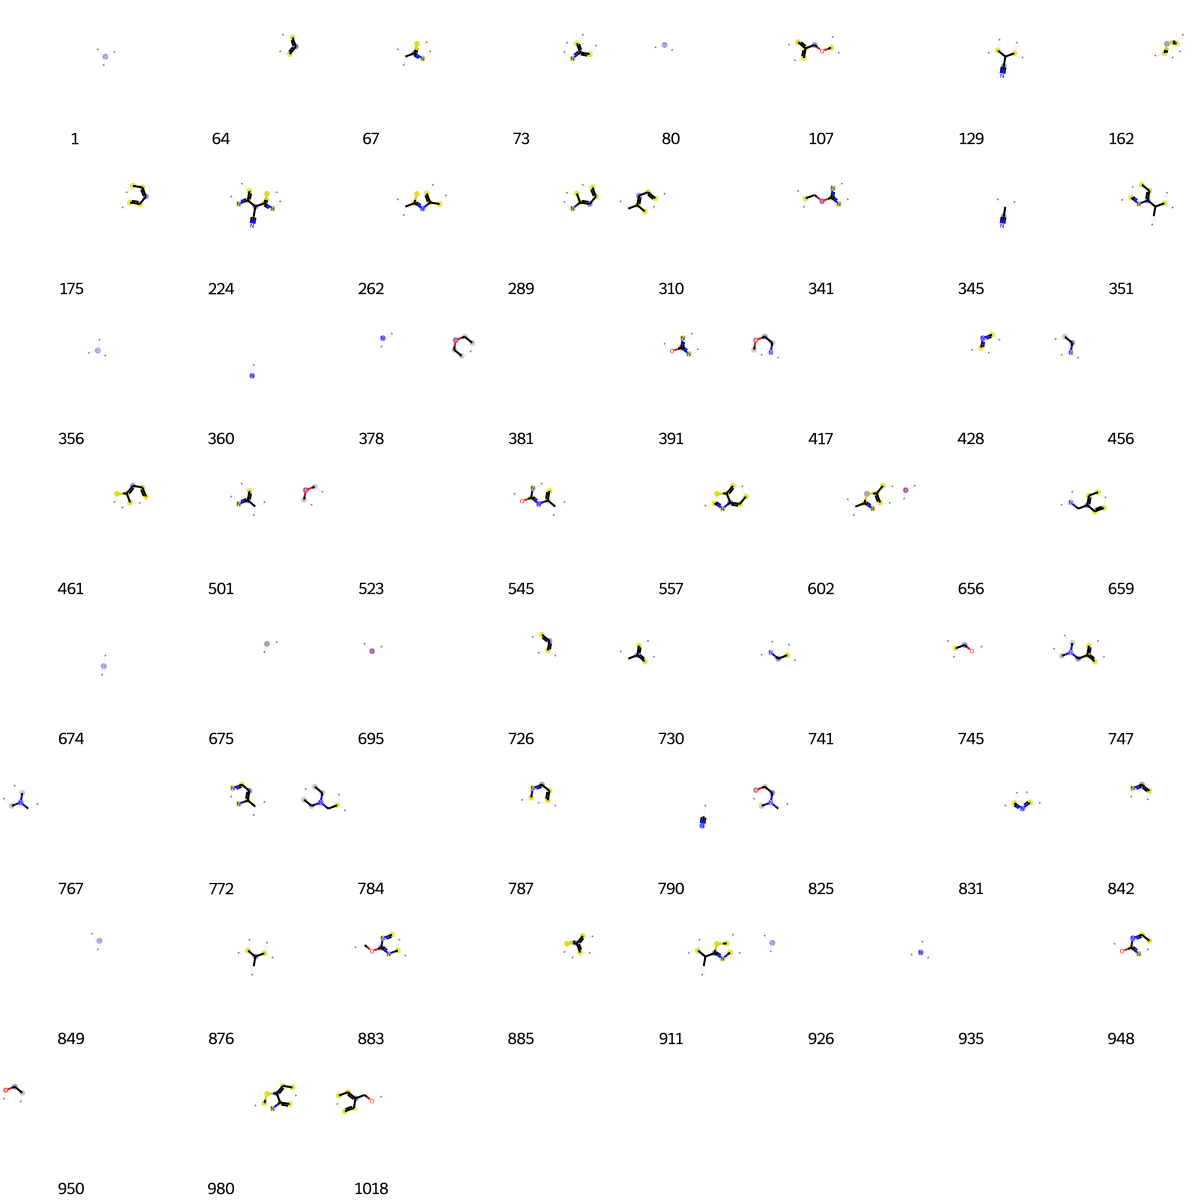

In [1364]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])